# **Have music listening habits changed over the last 6 years?**

## Project 1 - group 2

### Project aim:

#### In this project, we aim to understand whether music listening habits have changed in the last 6 years. 

#### There are two main reasons that lead us to believe music listening habits have changed:
- the global COVID pandemic (2020-2021) is likely to have led to changes in how people listen to music and what music they listen to;
- several articles mention the effects that the rise of social network TikTok (from 2018 on) is having on the music industry (see, for instance, https://theconversation.com/love-it-or-hate-it-tiktok-is-changing-the-music-industry-171482)

#### We thus hypothesise that **listening habits are likely to have changed**, and asked the following questions to investigate that question:
1. Have the music genres people listen to changed?
2. Have the artists people listen to changed?
3. Is the duration of the most popular songs decreasing?
4. How have other track features changed?


## Question 1: Have the music genres people listen to changed?

In [1]:
%matplotlib inline

# import dependencies
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# load data
spoti_df = pd.read_csv('../output_data/spotipy_data.csv')

### Top 10 genres: genres with the most number of songs in top 100 year playlists
#### In order to answer this question, we first looked at the top 10 genres for each of the 6 years in our data (2017-2022). In this analysis, the top 10 genres are defined as the genres with the largest number of songs in the top 100 for that year.

In [3]:
# create a new df where we unpack the artist genre column, so we can look at genre distribution across the years
genre_df = spoti_df
genre_df["artist genre"] = genre_df['artist genre'].apply(literal_eval)
genre_df = genre_df.explode("artist genre")

In [4]:
# group by year, and count number of songs per genre in each year
genre_by_year = genre_df.groupby("Year", as_index = True)["artist genre"].value_counts()

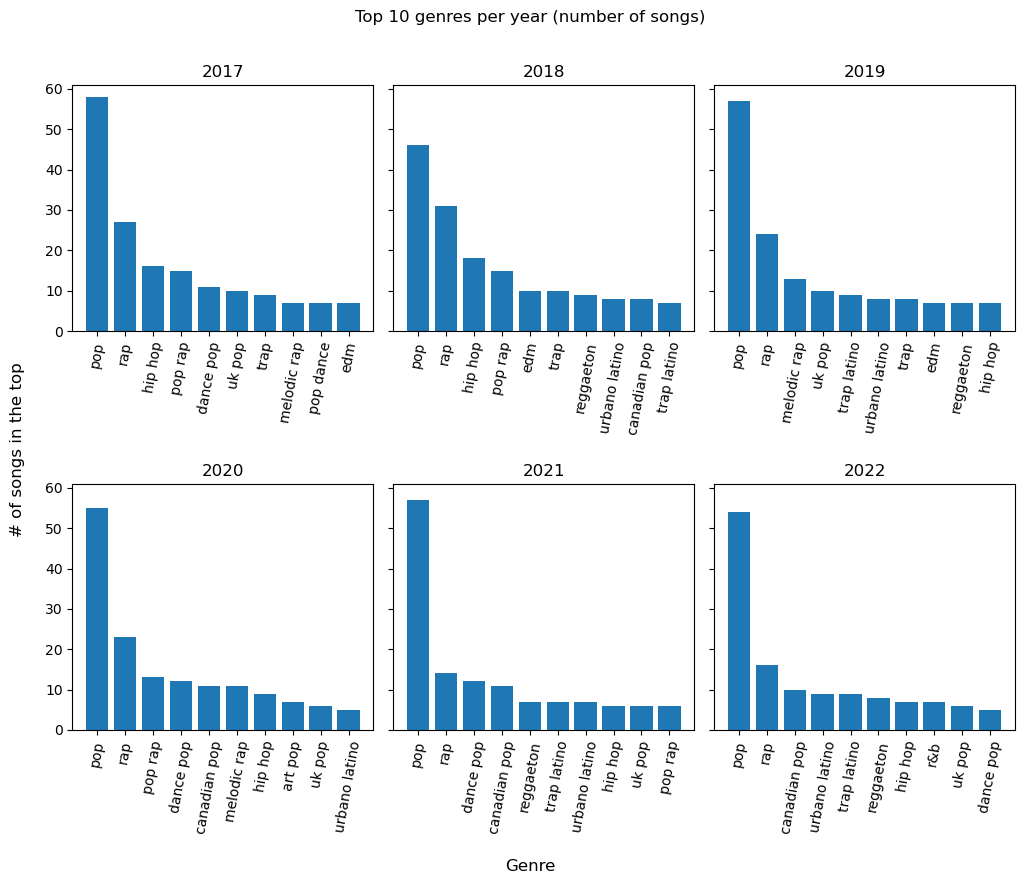

In [5]:
# create a plot showing the top 10 genres for each year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(10, 8))
axs[0, 0].bar(genre_by_year[2017][0:10].index.to_list(), [genre_by_year[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(genre_by_year[2018][0:10].index.to_list(), [genre_by_year[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(genre_by_year[2019][0:10].index.to_list(), [genre_by_year[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(genre_by_year[2020][0:10].index.to_list(), [genre_by_year[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(genre_by_year[2021][0:10].index.to_list(), [genre_by_year[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(genre_by_year[2022][0:10].index.to_list(), [genre_by_year[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.tick_params(axis = 'x', rotation = 80)
    
# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Top 10 genres per year (number of songs)", y = 1.05)

# save figure 
fig.savefig("../output_data/top_genres_numsongs.png", bbox_inches='tight')

# plot figure
plt.show()

#### As we can see from the above plots, while some genres have stayed consistently in the top 10 (e.g. pop and rap), others fluctuate throughout the 6 years. We thus wanted to have a closer look at some of the specific genres and see how the number of songs for these genres varies by year.

In [6]:
# get number of songs per year for specific genres
years = [2017, 2018, 2019, 2020, 2021, 2022]
pop = []
rap = []
hip_hop = []
canadian_pop = []
edm = []
dance_pop = []

for year in years:
    pop.append(genre_by_year[year]["pop"])
    rap.append(genre_by_year[year]["rap"])
    hip_hop.append(genre_by_year[year]["hip hop"])
    canadian_pop.append(genre_by_year[year]["canadian pop"])
    edm.append(genre_by_year[year]["edm"])
    dance_pop.append(genre_by_year[year]["dance pop"])

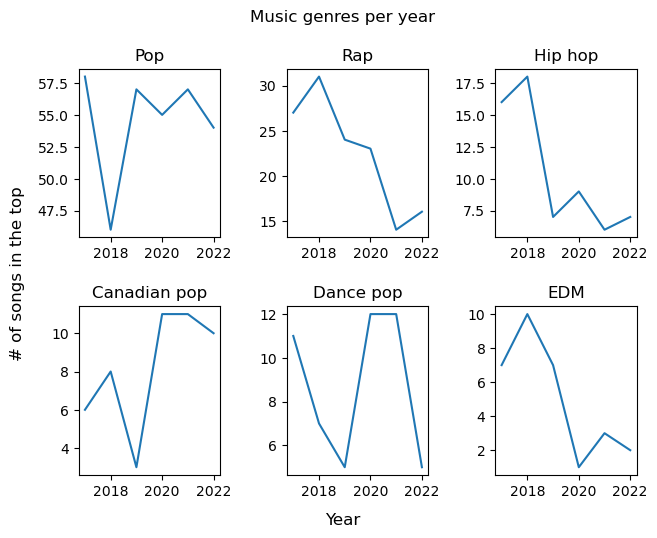

In [7]:
# create subplot
fig, axs = plt.subplots(2, 3)
axs[0,0].plot(years, pop)
axs[0,0].set_title('Pop')
axs[0,1].plot(years, rap)
axs[0,1].set_title('Rap')
axs[0,2].plot(years, hip_hop)
axs[0,2].set_title('Hip hop')
axs[1,0].plot(years, canadian_pop)
axs[1,0].set_title('Canadian pop')
axs[1,1].plot(years, dance_pop)
axs[1,1].set_title('Dance pop')
axs[1,2].plot(years, edm)
axs[1,2].set_title('EDM')

# fine tune it
fig.tight_layout(h_pad=1.8)
fig.supxlabel('Year', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Music genres per year", y = 1.05)

# save figure
fig.savefig("../output_data/specific_genres.png", bbox_inches='tight')

# plot figure
plt.show()

#### As these plots evidence, even the top 2 genres (pop and rap) fluctuate throughout the years. Other genres seem to have more consistent trends, with both hip-hop and EDM steadily decreasing from 2018 on. 

#### Two genres present curious trajectories though: whilst the number of canadian pop songs shoots up and in 2019 and remains at similar levels in the following years, the number of dance pop songs shoots up in "the covid years" (2020 and 2021), to then decrease steadily in 2022. 

#### And whilst the rise in Canadian pop can be traced to only 5 artists - with Drake accounting for nearly 50% of the songs, a lot more artists contributed to the dance pop rise in 2020 and 2021.

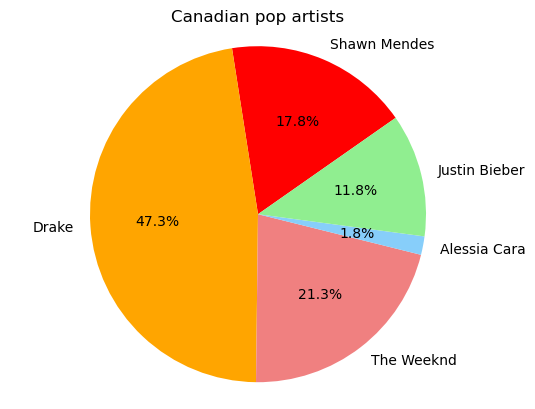

In [8]:
# get the names of canadian artists 
canadian_artists = pd.Series(genre_df[genre_df["artist genre"] == "canadian pop"]["artist name"].unique())

# and the song count for each of them
song_count = []
[song_count.append(len(genre_df[genre_df["artist name"] == artist].value_counts())) for artist in canadian_artists]
    
# define the plot colours and section separation
colors = ["red", "orange", "lightcoral", "lightskyblue", "lightgreen"]
explode = (0, 0, 0, 0, 0)

# create pie chart
plt.pie(song_count, explode=explode, labels=canadian_artists, colors=colors,
        autopct="%1.1f%%", startangle=35)
plt.axis("equal")
plt.title("Canadian pop artists")

# save fig
plt.savefig("../output_data/canadian_pop_artists.png")

# plot fig
plt.show()

In [9]:
pop_dance_artists = pd.Series(genre_df[genre_df["artist genre"] == "dance pop"]["artist name"].unique())
pop_dance_artists

0        Camila Cabello
1            Bruno Mars
2             Sean Paul
3              Dua Lipa
4                Avicii
5                  P!nk
6         Calvin Harris
7          Jason Derulo
8              DJ Snake
9            Bebe Rexha
10    Justin Timberlake
11            Lady Gaga
12             Doja Cat
13           Joel Corry
14      Black Eyed Peas
15              Shakira
16         David Guetta
dtype: object

## Top 10 genres: genres with the highest average popularity per year

#### Another way to measure top genres is to look at the genres of the most popular tracks each year. 

#### The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, for the most part, on the total number of plays the track has had and how recent those plays are.

In [10]:
# calculate average popularity for each genre, each year and sort values from highest to lowest popularity
popularity_df = genre_df.groupby(["Year","artist genre"])["track popularity"].mean().sort_values(ascending=False)

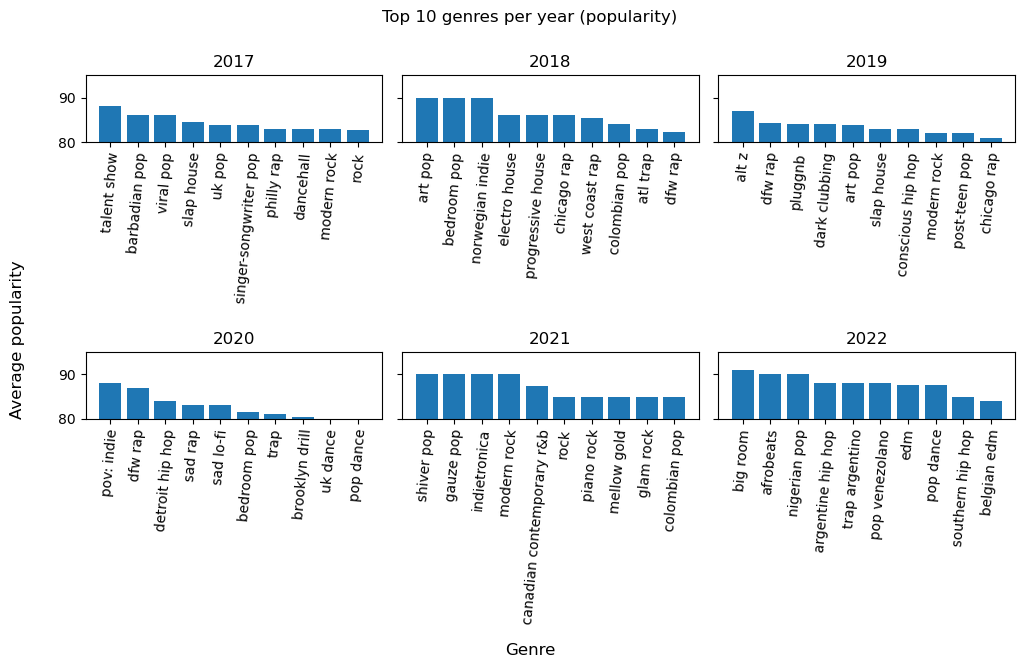

In [11]:
# plot most popular genres per year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(10, 6))
axs[0, 0].bar(popularity_df[2017][0:10].index.to_list(), [popularity_df[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(popularity_df[2018][0:10].index.to_list(), [popularity_df[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(popularity_df[2019][0:10].index.to_list(), [popularity_df[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(popularity_df[2020][0:10].index.to_list(), [popularity_df[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(popularity_df[2021][0:10].index.to_list(), [popularity_df[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(popularity_df[2022][0:10].index.to_list(), [popularity_df[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.set_ylim([80,95])
    ax.tick_params(axis = 'x', rotation = 85)


# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('Average popularity', x = -0.02)
plt.suptitle("Top 10 genres per year (popularity)", y = 1.05)

# save figure
plt.savefig("../output_data/top_genres_popularity.png", bbox_inches='tight')

# plot figure
plt.show()

#### The picture is a lot less consistent when looking at track popularity (compared to the number of songs), with no informative pattern emerging. 

## Question 2: Have the artists people listen to changed?

#### The top 100 list is assumed to be sorted in the order of the most streamed tracks.

#### We first looked at the first 10 artists to appear in each list and the name of the track in that position.

In [12]:
# Group the data by 'Year' to prepare for extraction
grouped_by_year = spoti_df.groupby('Year')

# Display the first 10 artists and songs for each year
for year, group in grouped_by_year:
    top_10_year = group.head(10)
    print(f"\nTop 10 in {year}:\n")
    print(top_10_year[['artist name', 'track name']])


Top 10 in 2017:

         artist name                               track name
0         Ed Sheeran                             Shape of You
1    Imagine Dragons                                 Believer
2         Luis Fonsi                                Despacito
3  Machine Gun Kelly         Bad Things (with Camila Cabello)
4       Clean Bandit  Rockabye (feat. Sean Paul & Anne-Marie)
5     Camila Cabello                Havana (feat. Young Thug)
6    Imagine Dragons                                  Thunder
7           Maroon 5  Don't Wanna Know (feat. Kendrick Lamar)
8   The Chainsmokers                 Something Just Like This
9         Ed Sheeran                                  Perfect

Top 10 in 2018:

          artist name                                         track name
30     Kendrick Lamar                                LOVE. FEAT. ZACARI.
50             G-Eazy                              Him & I (with Halsey)
68   Hailee Steinfeld  Let Me Go (with Alesso, Florida Georgia 

#### We were curious to see what the average song count per artist was for each year.

In [13]:
# Group data by Year and artist name then count unique songs and calculate the average
songs_per_artist = spoti_df.groupby(['Year',
                                        'artist name'])['id'].nunique().reset_index(name='num_songs')

# Calculate average songs per artist for each year
avg_songs_per_artist = songs_per_artist.groupby('Year'
                                                   )['num_songs'
                                                    ].mean().reset_index(name='avg_songs_per_artist')

# Convert into a DataFrame for readability
avg_songs_per_artist_df = pd.DataFrame(avg_songs_per_artist)
avg_songs_per_artist_df = avg_songs_per_artist_df.rename(columns={'avg_songs_per_artist'
                                                                  : 'Average Song Per Artist'})

avg_songs_per_artist_df

,Year,Average Song Per Artist
0,2017,1.315789
1,2018,1.298701
2,2019,1.388889
3,2020,1.449275
4,2021,1.562500
5,2022,1.470588


#### After finding out the averages, we decided to look at which artists had multiple songs appearing in each top 100 list only selecting the first five in descending order.

In [14]:
# Get top 5 most active artists per year:
# Group data by Year and artist name then count occurrences and sort the values
artist_activity = spoti_df.groupby(['Year', 'artist name'
                                      ]).size().reset_index(name='song_count'
                                                           ).sort_values(by=['Year', 'song_count'
                                                                            ], ascending=[True, False])

# Get the top 5 active artists for each year
five_successful_artists_by_year = artist_activity.groupby('Year').head(5)

# Convert into a DataFrame for readability
yearly_five_artist_df = pd.DataFrame(five_successful_artists_by_year)
yearly_five_artist_df = yearly_five_artist_df.rename(columns={'song_count': '# Songs',
                                                    'artist name': 'Artist Name'})

yearly_five_artist_df

,Year,Artist Name,# Songs
20,2017,Ed Sheeran,5
34,2017,Kendrick Lamar,4
27,2017,Imagine Dragons,3
5,2017,Avicii,2
9,2017,Bruno Mars,2
97,2018,Drake,5
123,2018,Marshmello,4
88,2018,Cardi B,3
124,2018,Migos,3
131,2018,Post Malone,3


#### This table was not very easy to interpret, so we felt a bar graph would provide the best visualisation.

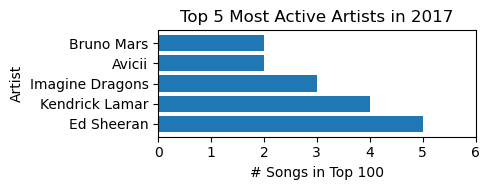

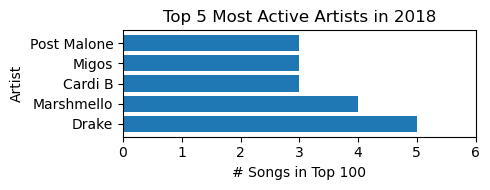

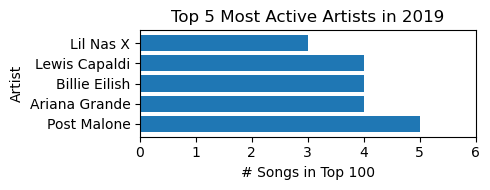

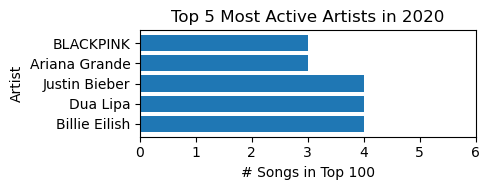

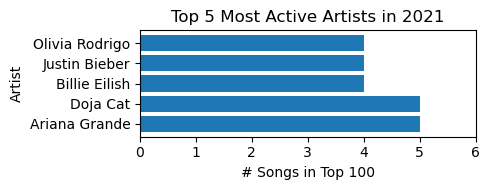

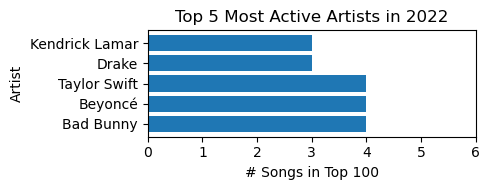

In [15]:
# Group the data by Year and artist name to prepare for plotting
grouped_data = five_successful_artists_by_year.groupby('Year')

# Create separate plots for each year
for name, group in grouped_data:
    plt.figure(figsize=(5, 2))
    plt.barh(group['artist name'], group['song_count'])
    plt.xlabel('# Songs in Top 100')
    plt.ylabel('Artist')
    plt.title(f'Top 5 Most Active Artists in {name}')
    plt.xlim(0, 6)
    plt.tight_layout()
    plt.savefig(f"../output_data/top_active_artists_song_count_{name}.png", bbox_inches='tight')
    plt.show()

#### With this information, we wanted to find out if track duration may have contributed to these artists having multiple top 100 tracks, so we worked out each artist's average track duration per year.

In [16]:
# Extract track durations
track_durations = spoti_df['duration_ms']
# Convert track durations from ms to mins
track_durations_minutes = [duration / 60000 for duration in track_durations]

# Add track durations to the existing DataFrame
spoti_df['track_duration_mins'] = track_durations_minutes

# Group data by Year and artist name to calculate the average track duration for top 5 artists
grouped_by_artist = spoti_df.groupby(['Year', 'artist name'])

# Get the top 5 artists for each year based on song count
for year, group in five_successful_artists_by_year.groupby('Year'):
    print(f"\nYear: {year}")
    for index, row in group.iterrows():
        artist_name = row['artist name']
        # Filter data for the specific artist in the given year
        artist_data = grouped_by_artist.get_group((year, artist_name))
        # Calculate average track duration for the artist
        average_duration = artist_data['track_duration_mins'].mean()
        print(f"Artist Name (AVG Track Duration): {artist_name} ({average_duration:.1f}mins)")


Year: 2017
Artist Name (AVG Track Duration): Ed Sheeran (3.8mins)
Artist Name (AVG Track Duration): Kendrick Lamar (3.3mins)
Artist Name (AVG Track Duration): Imagine Dragons (3.3mins)
Artist Name (AVG Track Duration): Avicii (3.0mins)
Artist Name (AVG Track Duration): Bruno Mars (3.6mins)

Year: 2018
Artist Name (AVG Track Duration): Drake (3.6mins)
Artist Name (AVG Track Duration): Marshmello (3.2mins)
Artist Name (AVG Track Duration): Cardi B (3.8mins)
Artist Name (AVG Track Duration): Migos (4.3mins)
Artist Name (AVG Track Duration): Post Malone (3.7mins)

Year: 2019
Artist Name (AVG Track Duration): Post Malone (3.1mins)
Artist Name (AVG Track Duration): Ariana Grande (3.2mins)
Artist Name (AVG Track Duration): Billie Eilish (3.3mins)
Artist Name (AVG Track Duration): Lewis Capaldi (3.3mins)
Artist Name (AVG Track Duration): Lil Nas X (2.1mins)

Year: 2020
Artist Name (AVG Track Duration): Billie Eilish (3.4mins)
Artist Name (AVG Track Duration): Dua Lipa (3.3mins)
Artist Name (A

#### A bar graph felt the most appropriate to visualise the data.

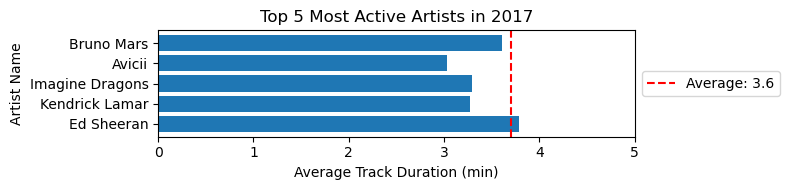

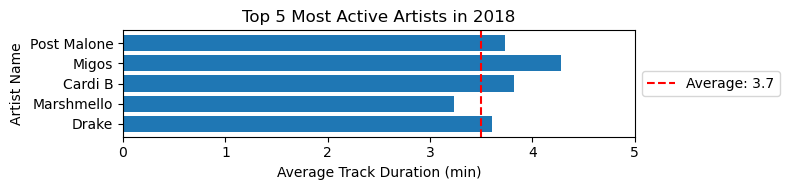

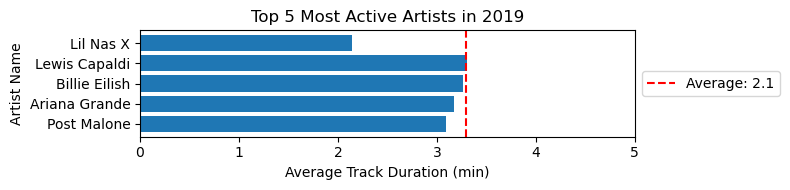

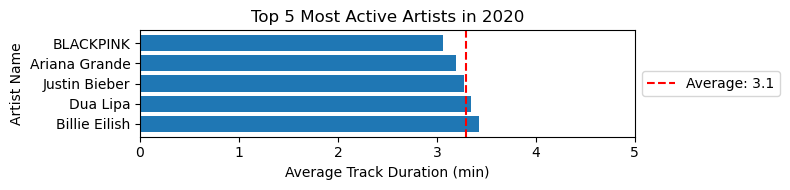

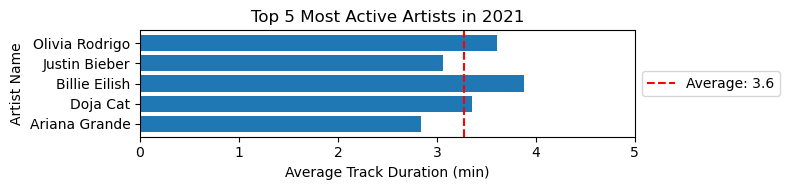

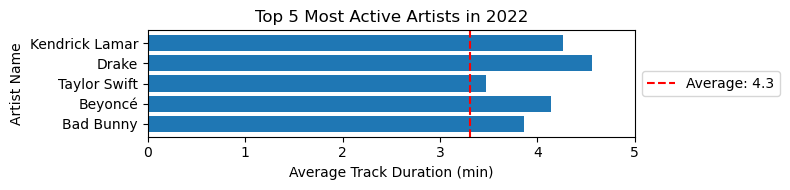

In [17]:
# Calculate the average track duration for each year
avg_duration_per_year = spoti_df.groupby('Year')['duration_ms'].mean() / 60000
avg_duration_per_year = avg_duration_per_year.reset_index(name='Average Duration (min)')

# Group data by Year and artist name to calculate the average track duration for top 5 artists
grouped_by_artist = spoti_df.groupby(['Year', 'artist name'])

# Get the top 5 artists for each year based on song count
for year, group in five_successful_artists_by_year.groupby('Year'):
    artist_names = []
    average_durations = []
    for index, row in group.iterrows():
        artist_name = row['artist name']
        artist_names.append(artist_name)
        # Filter data for the specific artist in the given year
        artist_data = grouped_by_artist.get_group((year, artist_name))
        # Calculate average track duration for the artist
        average_duration = artist_data['duration_ms'].mean() / 60000
        average_durations.append(average_duration)

    # Get the average duration for the specific year
    avg_duration_for_year = avg_duration_per_year[avg_duration_per_year
                                                  ['Year'] == year]['Average Duration (min)'
                                                                   ].values[0]

    # Create a bar graph for the year with a vertical line for the average duration
    plt.figure(figsize=(8, 2))
    plt.barh(artist_names, average_durations)
    plt.axvline(x=avg_duration_for_year, color='red', linestyle='--',
                label=f'Average: {average_duration:.1f}')
    plt.xlabel('Average Track Duration (min)')
    plt.ylabel('Artist Name')
    plt.title(f'Top 5 Most Active Artists in {year}')
    plt.xlim(0, 5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"../output_data/top_active_artists_track_duration_{year}.png", bbox_inches='tight')
    plt.show()

#### We looked at whether these artists appeared every year in our sample data to determine which ones followed the hypothesis we presented of shorter songs being more popular during COVID-19.

#### To begin with, we identified any artist with at least one song in each year.

In [18]:
# Group data by artist name and count the unique years each artist appears in
artists_years_count = spoti_df.groupby('artist name')['Year'].nunique()

# Filter artists that appear in every year by the number of unique years matches the total number of years
consistant_artists = artists_years_count[artists_years_count == len(years)]
# Display artists that appear in every year
print("Artists with at least one song every year:")
print(consistant_artists.index.tolist())

Artists with at least one song every year:
['Billie Eilish', 'Drake', 'Post Malone', 'Shawn Mendes', 'Taylor Swift']


#### We removed Shawn Mendes as he is not one of the most active artists in any of the years in the sample size, and therefore would provide little relevant data.

#### For the final part of visualisation, a line graph would provide the clearest picture.



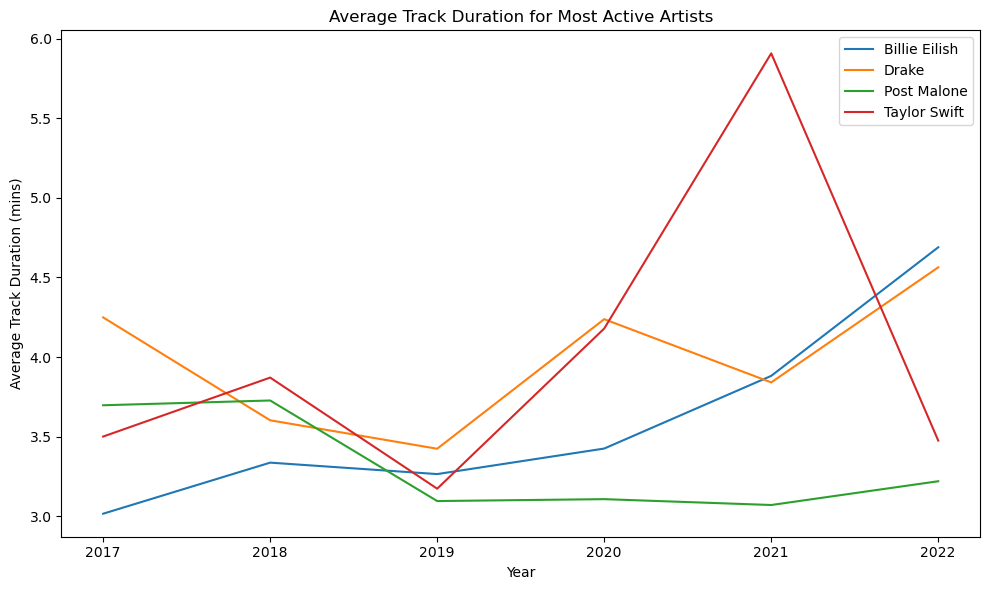

In [19]:
# Filter data for the selected artists
selected_artists = ['Billie Eilish', 'Drake', 'Post Malone', 'Taylor Swift']
selected_artists_data = spoti_df[spoti_df['artist name'].isin(selected_artists)]

# Group data by artist name and Year, and calculate the mean track duration for each artist for each year
grouped_artists = selected_artists_data.groupby(['artist name', 'Year'])['track_duration_mins'].mean()

# Plot a line graph for each artist's track duration over the years
plt.figure(figsize=(10, 6))
for artist in selected_artists:
    artist_data = grouped_artists.loc[artist]
    plt.plot(artist_data.index.get_level_values('Year'), artist_data.values, label=artist)

plt.xlabel('Year')
plt.ylabel('Average Track Duration (mins)')
plt.title('Average Track Duration for Most Active Artists')
plt.legend()
plt.tight_layout()
plt.savefig("../output_data/top_active_artists_trend.png", bbox_inches='tight')
plt.show()

#### From the above graph we can see that most of these artists did decide to reduce their mean song length around the years 2019 and 2020, which may have contributed to them remaining consistently in the top 100 between 2017-2022 and having multiple hits each year in this period.

## Question 3: Is the duration of the most popular songs decreasing?

In [20]:
# convert milliseconds to minutes
def mil_to_minf(milliseconds):
    minutes_float = milliseconds / 60000
    return minutes_float

# # convert minutes to milliseconds
# def minf_to_mil(minutes_float):
#     milliseconds = minutes_float * 60000
#     return milliseconds

# # convert milliseconds to minute_seconds
# def mil_to_minsec(milliseconds):
#     seconds, milliseconds = divmod(milliseconds, 1000)
#     minutes, seconds = divmod(seconds, 60)
#     return minutes, seconds

# # convert minutes to minute_seconds
# def minf_to_minsec(minutes_float):
#     milliseconds = minutes_float * 60000
#     seconds, milliseconds = divmod(milliseconds, 1000)
#     minutes, seconds = divmod(seconds, 60)
#     return rminutes, seconds

In [21]:
# Average duration vs year (line)
years = []
duration_minf = []
duration_mean_minf = []
duration_median_minf = []
duration_var_minf = []
duration_std_minf = []
duration_sem_minf = []
popularity = []

for year in range (2017, 2023):
    years.append(year)
    yearly_popularity = spoti_df[spoti_df["Year"]==year]["track popularity"]
    yearly_duration_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"])
    yearly_duration_mean_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).mean()
    yearly_duration_median_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).median()
    yearly_duration_var_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).var()
    yearly_duration_std_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).std()
    yearly_duration_sem_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).sem()

    popularity.append(yearly_popularity)
    duration_minf.append(yearly_duration_minf)
    duration_mean_minf.append(yearly_duration_mean_minf)
    duration_median_minf.append(yearly_duration_median_minf)
    duration_var_minf.append(yearly_duration_var_minf)
    duration_std_minf.append(yearly_duration_std_minf)
    duration_sem_minf.append(yearly_duration_sem_minf)

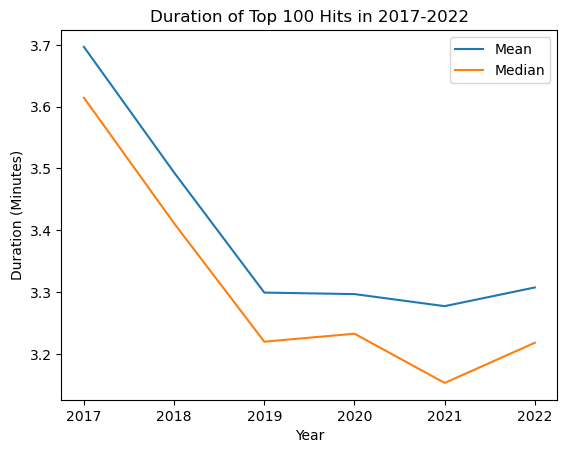

In [22]:
# Create line plot
plt.plot(years, duration_mean_minf, label="Mean")
plt.plot(years, duration_median_minf, label="Median")
plt.legend()
plt.title("Duration of Top 100 Hits in 2017-2022")
plt.xlabel("Year")
plt.ylabel("Duration (Minutes)")

# Save and show the line plot
plt.savefig("../output_data/duration_line.png")
plt.show()

In [23]:
# Verify data validity of data
# Assembling the resulting series into a DataFrame
duration_minf_df = pd.DataFrame({
                         "Year": range(2017,2023),
                         "Mean Duration (Min)": duration_mean_minf, 
                         "Median Duration (Min)": duration_median_minf, 
                         "Duration Variance": duration_var_minf, 
                         "Duration Std Dev (Min)": duration_std_minf, 
                         "Duration Std Error (Min)": duration_sem_minf})
duration_minf_df = duration_minf_df.set_index("Year")
duration_minf_df

,Mean Duration (Min),Median Duration (Min),Duration Variance,Duration Std Dev (Min),Duration Std Error (Min)
Year,,,,,
2017,3.696559,3.614300,0.377447,0.614367,0.061437
2018,3.493342,3.411150,0.473991,0.688470,0.068847
2019,3.299159,3.219750,0.411002,0.641094,0.064109
2020,3.296727,3.232642,0.387976,0.622877,0.062288
2021,3.277226,3.153033,0.832665,0.912505,0.091250
2022,3.307454,3.218025,0.444619,0.666797,0.066680


#### For both the median and mean duration of the top 100 Spotify hits of the year, there is a downward trend from 2017 to 2022. The drop from 2017 to 2019 is the most significant. The average duration of top hits in 2019 is around 0.4 minutes (~24 seconds) shorter than the hits in 2017. From 2019 to 2022, top hit songs remain similar.

#### Both the mean duration and median duration of the top songs were the lowest in 2021. The standard deviation of the data in 2021 is 0.91, which is drastically higher than in other years. We will look into the cause of the high standard deviation value.

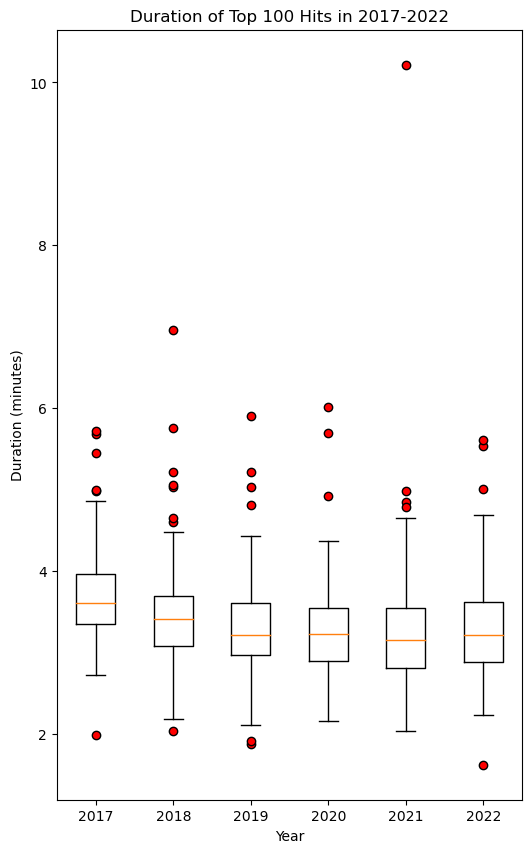

In [24]:
# Duration vs year (boxplot)
    
# Create Boxplot
fig1, ax1 = plt.subplots(figsize=(6,10))
ax1.boxplot(duration_minf, labels = years, flierprops = dict(markersize = 6, markerfacecolor = "red"))
ax1.set_title("Duration of Top 100 Hits in 2017-2022")
ax1.set_xlabel("Year")
ax1.set_ylabel("Duration (minutes)")

# Save and show the boxplot
plt.savefig("../output_data/duration_box.png")
plt.show()

In [25]:
#Finding the longest song in 2021
songs_2021_df = spoti_df[spoti_df["Year"] == 2021].copy()
songs_2021_df["duration_minutes"] = mil_to_minf(songs_2021_df["duration_ms"])
songs_2021_df = songs_2021_df[["track name","artist name","duration_minutes"]].sort_values(by = "duration_minutes", ascending = False)
songs_2021_df.iloc[0,:]

track name          All Too Well (10 Minute Version) (Taylor's Ver...
artist name                                              Taylor Swift
duration_minutes                                            10.217117
Name: 430, dtype: object

#### It is generally true that the duration of the top 100 hit songs becomes shorter from 2017 through 2022. While this trend continued during the period of COVID-19 (2020-2022), there is little evidence to show that COVID-19 is a major factor that contributes to this trend.

#### According to a 2018 study by San Francisco-based engineer Michael Tauberg, the average duration of a track has been steadily decreasing each year since 2000, though fluctuations can be seen in some years.

#### While the trend is that the duration of popular hits has become shorter in recent years, the variety remains large. Based on the boxplot, outliers can be found every year. The most significant one is "All Too Well (10 Minute Version) (Taylor's Version)" by Taylor Swift in 2021. The song is over 10 minutes long, which contributes to the high standard deviation value in that year. Despite the popularity of this long hit, the average duration of the top 100 songs is the lowest in 2021 within the 2017-2022 period.

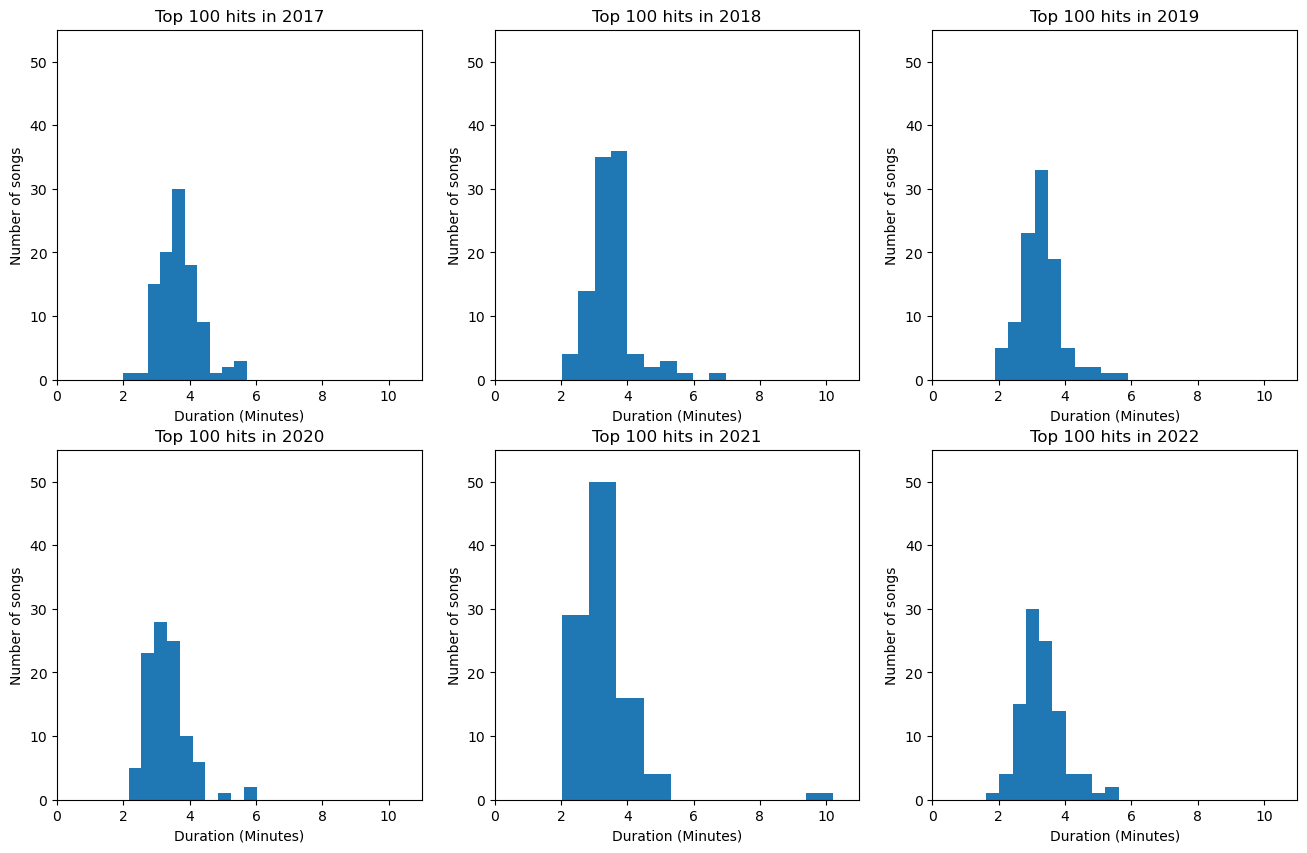

In [26]:
# Duration per year (histogram)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 55)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Number of songs")

for i in range(6):
    axs[divmod(i,3)[0], divmod(i,3)[1]].hist(duration_minf[i])
    axs[divmod(i,3)[0], divmod(i,3)[1]].set_title(f"Top 100 hits in {years[i]}")

# Save and show the histogram
plt.savefig("../output_data/duration_histogram.png")
plt.show()

#### From 2017 to 2022, there is a shift in the histogram to the left, suggesting that there are more shorter hit songs in 2022 when compared to 2017.

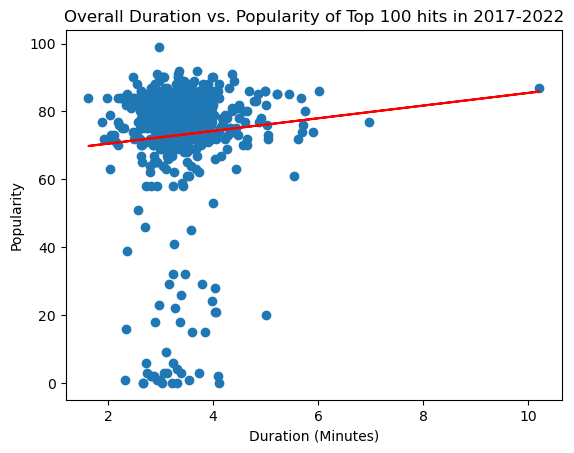

Linear equation: y = 1.87x + 66.78
The r value is: 0.07274074235422119


In [27]:
# Duration vs populartiy overall

duration_ms = spoti_df["duration_ms"]
x_axis = mil_to_minf(duration_ms)
y_axis = spoti_df["track popularity"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color = "red")
plt.title("Overall Duration vs. Popularity of Top 100 hits in 2017-2022")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Popularity")

# Save and show the scatter
plt.savefig("../output_data/duration_popularity_overall.png")
plt.show()
print(f"Linear equation: {line_eq}")
print(f"The r value is: {rvalue}")

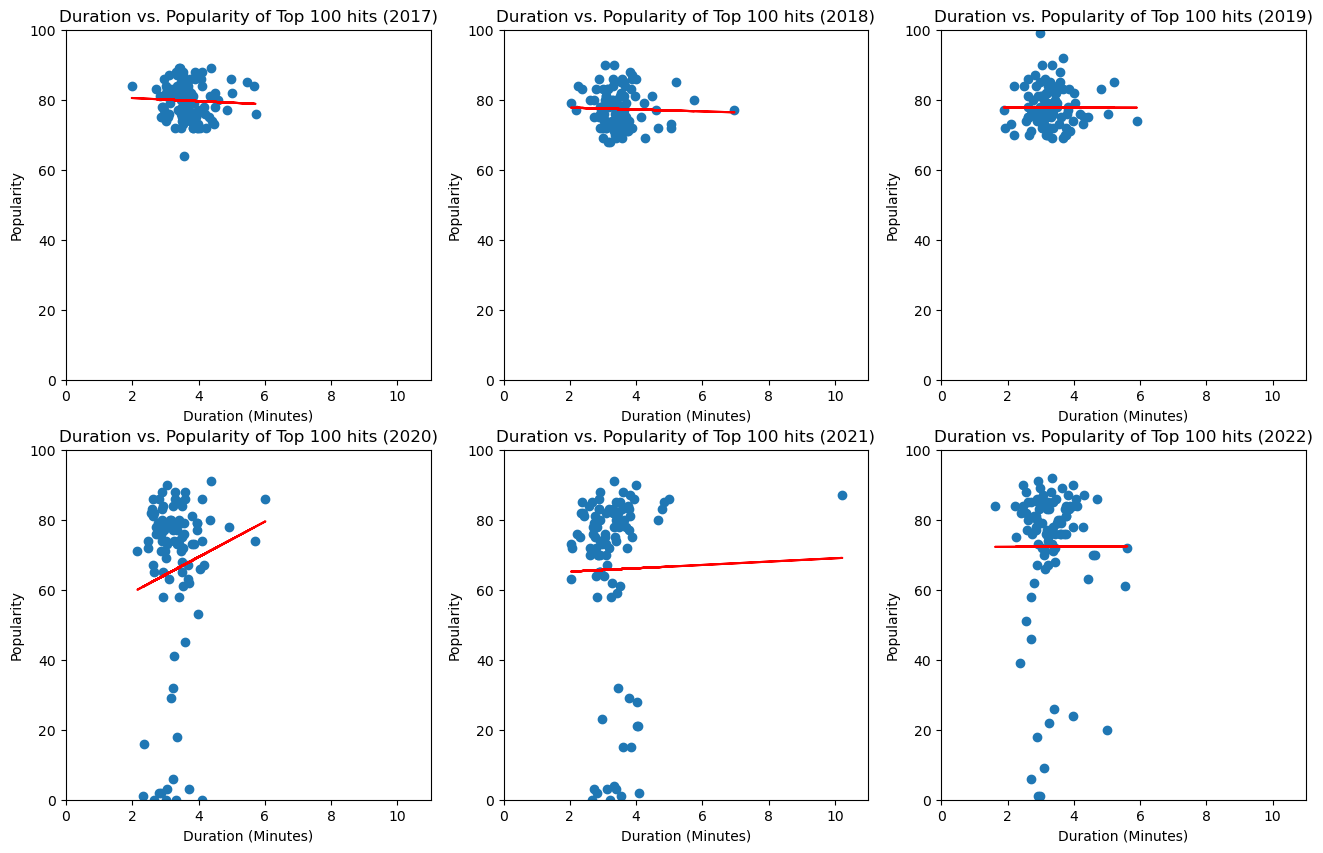

2017 	 Linear equation: y = -0.45x + 81.38 		 r value: -0.0537
2018 	 Linear equation: y = -0.27x + 78.29 		 r value: -0.0341
2019 	 Linear equation: y = -0.02x + 77.82 		 r value: -0.0017
2020 	 Linear equation: y = 5.06x + 49.09 		 r value: 0.1248
2021 	 Linear equation: y = 0.48x + 64.22 		 r value: 0.0168
2022 	 Linear equation: y = 0.04x + 72.18 		 r value: 0.0011


In [28]:
regress_values = []
line_eqs = []
rvalues = []
for i in range(6):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(duration_minf[i], popularity[i])
    regress_value = duration_minf[i] * slope + intercept
    regress_values.append(regress_value)
    line_eqs.append("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    rvalues.append(rvalue)

# Duration vs popularity per year (Scatter Plot)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 100)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Popularity")

for i in range(6):
    axs[divmod(i,3)[0], divmod(i,3)[1]].scatter(duration_minf[i], popularity[i])
    axs[divmod(i,3)[0], divmod(i,3)[1]].plot(duration_minf[i],regress_values[i], color = "red")
    axs[divmod(i,3)[0], divmod(i,3)[1]].set_title(f"Duration vs. Popularity of Top 100 hits ({years[i]})")

# Save and show the scatter
plt.savefig("../output_data/duration_popularity_year.png")
plt.show()

for i in range(6):
    print(f"{years[i]} \t Linear equation: {line_eqs[i]} \t\t r value: {round(rvalues[i],4)}")

#### The average duration of hit songs has become shorter. That leads to the question of whether shorter songs are more popular. Scatter plots are generated to show the correlations between duration and popularity.

#### From the scatter plots, a positive r value means longer songs are more popular, and a negative r value means shorter songs are more popular. The r values are negative in 2017, 2018 and 2019, and they are positive in 2020, 2021 and 2022. Nevertheless, the figures are so close to zero that the correlation between duration and popularity is close to none.

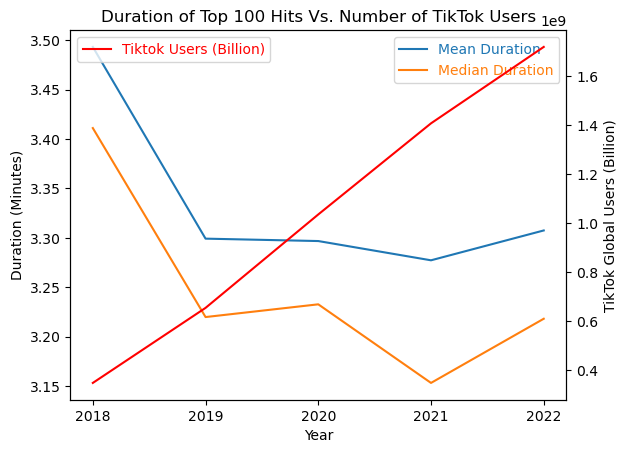

The r value between mean duration and number of TikTok users is -0.6857056347980467.
The r value between median duration and number of TikTok users is -0.7333031881659963.


In [29]:
# Line plot vs Tiktok
# code reference
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

tiktok_users = [347100000, 653500000, 1035000000, 1407000000, 1719000000]

fig, ax1 = plt.subplots()
ax1.set_title("Duration of Top 100 Hits Vs. Number of TikTok Users")
ax1.plot(years[1:6], duration_mean_minf[1:6], label = "Mean Duration")
ax1.plot(years[1:6], duration_median_minf[1:6], label = "Median Duration")
ax1.set_xlabel("Year")

plt.xticks(years)
ax1.set_ylabel("Duration (Minutes)")
plt.legend(labelcolor="linecolor")

ax2 = ax1.twinx()
ax2.set_ylabel("TikTok Global Users (Billion)")
ax2.plot(years[1:6], tiktok_users, label = "Tiktok Users (Billion)", color = "red")

plt.legend(labelcolor="linecolor")

# Save and show the line plot
plt.savefig("../output_data/duration_line_tiktok.png")
plt.show()
r_mean = st.pearsonr(duration_mean_minf[1:6], tiktok_users)[0]
r_median = st.pearsonr(duration_median_minf[1:6], tiktok_users)[0]
print(f"The r value between mean duration and number of TikTok users is {r_mean}.")
print(f"The r value between median duration and number of TikTok users is {r_median}.")

##### It was suggested by many analysts that the trend of shorter music duration is contributed by the rise of TikTok and other short-form video social media websites. These social media platforms are major causes of shorter audience attention spans. A line plot is created to find out the correlation between music duration and the number of TikTok users. For both mean duration and median duration, the r value between duration and number of TikTok users is around -0.7, suggesting that the negative correlation between the two is significant enough for further analysis.

### Links about Music Duration

#### Michael Tauberg (27 Apr 2018) - Music is Getting Shorter
https://michaeltauberg.medium.com/music-and-our-attention-spans-are-getting-shorter-8be37b5c2d67

#### Gary Trust, Billboard (4 Jun 2019) - Billboard Hot 100 Top 10s in 2019 Are, On Average, 30 Seconds Shorter Than Last Year https://www.billboard.com/pro/hot-100-top-10s-30-seconds-shorter-2019/

#### Elias Leight, Billboard (18 Nov 2022) - Here’s Why Shorter Songs Are Surging (And Why Some Welcome It)
https://www.billboard.com/pro/songs-getting-shorter-tiktok-streaming/

#### Laura Ceci, Statista (23 Aug 2023)- Number of TikTok users worldwide from 2018 to 2027
https://www.statista.com/forecasts/1142687/tiktok-users-worldwide

#### Gary Trust, Billboard (28 Nov 2023) - André 3000 Breaks Hot 100 Record With 12-Minute, 20-Second Hit From New Album
https://www.billboard.com/lists/andre-3000-breaks-hot-100-record-12-minute-song/1220-i-swear-i-really-wanted-to-make-a-rap-album-but-this-is-literally-the-way-the-wind-blew-me-this-time-andre-3000/


# Question 4: How have other track features changed?

### Summary Statistics Tables

#### Below is a series of summary statistics tables and charts for the averages of each track feature/aspect

In [30]:
# Summary statistics table for Danceability 
dance_mean = spoti_df.groupby("Year")["danceability"].mean()
dance_median = spoti_df.groupby("Year")["danceability"].median()
dance_variance = spoti_df.groupby("Year")["danceability"].var()
dance_std = spoti_df.groupby("Year")["danceability"].std()
dance_sem = spoti_df.groupby("Year")["danceability"].sem()

# Assembling the resulting series into a DataFrame
dance_df = pd.DataFrame({"Mean Danceability": dance_mean, 
                         "Median Danceability": dance_median, 
                         "Danceability Variance": dance_variance, 
                         "Danceability Std Dev": dance_std, 
                         "Danceability Std Error": dance_sem})
dance_df.index.name = "Year"
dance_df

,Mean Danceability,Median Danceability,Danceability Variance,Danceability Std Dev,Danceability Std Error
Year,,,,,
2017,0.69548,0.7115,0.017488,0.132240,0.013224
2018,0.70376,0.7015,0.017013,0.130434,0.013043
2019,0.71095,0.7365,0.018476,0.135928,0.013593
2020,0.70335,0.7195,0.015395,0.124076,0.012408
2021,0.69239,0.7135,0.017592,0.132634,0.013263
2022,0.66973,0.6870,0.024480,0.156460,0.015646


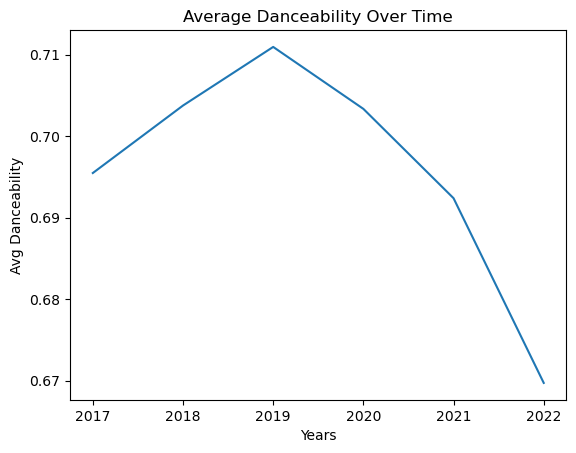

In [31]:
dance_avg_x = dance_df.index
dance_avg_y = dance_df["Mean Danceability"]
plt.plot(dance_avg_x, dance_avg_y)
plt.title("Average Danceability Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Danceability")
plt.savefig("../output_data/avg_dance.png")

In [32]:
# Summary statistics table for Energy 
energy_mean = spoti_df.groupby("Year")["energy"].mean()
energy_median = spoti_df.groupby("Year")["energy"].median()
energy_variance = spoti_df.groupby("Year")["energy"].var()
energy_std = spoti_df.groupby("Year")["energy"].std()
energy_sem = spoti_df.groupby("Year")["energy"].sem()

# Assembling the resulting series into a DataFrame
energy_df = pd.DataFrame({"Mean Energy": energy_mean, 
                          "Median Energy": energy_median, 
                          "Energy Variance": energy_variance, 
                          "Energy Std Dev": energy_std, 
                          "Energy Std Error": energy_sem})
energy_df.index.name = "Year"
energy_df

,Mean Energy,Median Energy,Energy Variance,Energy Std Dev,Energy Std Error
Year,,,,,
2017,0.63109,0.6525,0.025006,0.158134,0.015813
2018,0.66027,0.6760,0.019827,0.140807,0.014081
2019,0.61981,0.6275,0.026349,0.162323,0.016232
2020,0.61426,0.6270,0.024518,0.156581,0.015658
2021,0.61450,0.6175,0.021417,0.146345,0.014634
2022,0.63938,0.6720,0.026814,0.163749,0.016375


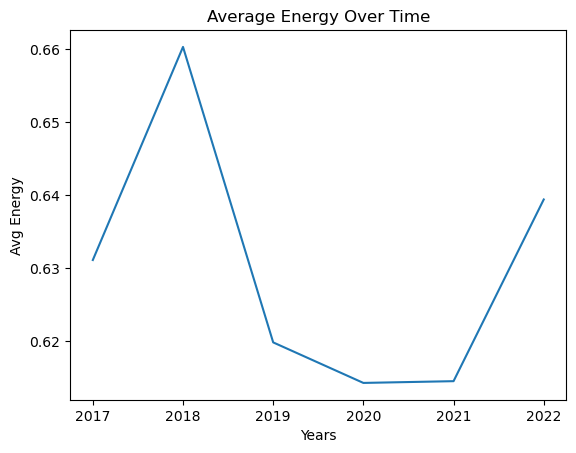

In [33]:
energy_avg_x = energy_df.index
energy_avg_y = energy_df["Mean Energy"]
plt.plot(energy_avg_x, energy_avg_y)
plt.title("Average Energy Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Energy")
plt.savefig("../output_data/avg_energy.png")

In [34]:
# Summary statistics table for Liveness 
live_mean = spoti_df.groupby("Year")["liveness"].mean()
live_median = spoti_df.groupby("Year")["liveness"].median()
live_variance = spoti_df.groupby("Year")["liveness"].var()
live_std = spoti_df.groupby("Year")["liveness"].std()
live_sem = spoti_df.groupby("Year")["liveness"].sem()

# Assembling the resulting series into a DataFrame
live_df = pd.DataFrame({"Mean Liveness": live_mean, 
                        "Median Liveness": live_median, 
                        "Liveness Variance": live_variance, 
                        "Liveness Std Dev": live_std, 
                        "Liveness Std Error": live_sem})
live_df.index.name = "Year"
live_df

,Mean Liveness,Median Liveness,Liveness Variance,Liveness Std Dev,Liveness Std Error
Year,,,,,
2017,0.154736,0.1225,0.009066,0.095217,0.009522
2018,0.165453,0.1195,0.015924,0.126190,0.012619
2019,0.152862,0.1110,0.012987,0.113959,0.011396
2020,0.173261,0.1135,0.020173,0.142032,0.014203
2021,0.162127,0.1215,0.012865,0.113424,0.011342
2022,0.171964,0.1180,0.014170,0.119036,0.011904


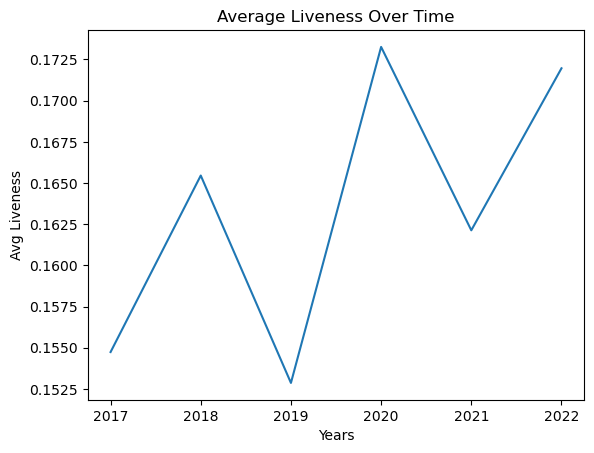

In [35]:
live_avg_x = live_df.index
live_avg_y = live_df["Mean Liveness"]
plt.plot(live_avg_x, live_avg_y)
plt.title("Average Liveness Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Liveness")
plt.savefig("../output_data/avg_live.png")

In [36]:
# Summary statistics table for Valence 
vale_mean = spoti_df.groupby("Year")["valence"].mean()
vale_median = spoti_df.groupby("Year")["valence"].median()
vale_variance = spoti_df.groupby("Year")["valence"].var()
vale_std = spoti_df.groupby("Year")["valence"].std()
vale_sem = spoti_df.groupby("Year")["valence"].sem()

# Assembling the resulting series into a DataFrame
vale_df = pd.DataFrame({"Mean Valence": vale_mean, 
                        "Median Valence": vale_median, 
                        "Valence Variance": vale_variance, 
                        "Valence Std Dev": vale_std, 
                        "Valence Std Error": vale_sem})
vale_df.index.name = "Year"
vale_df

,Mean Valence,Median Valence,Valence Variance,Valence Std Dev,Valence Std Error
Year,,,,,
2017,0.464541,0.4400,0.050401,0.224501,0.022450
2018,0.467752,0.4615,0.042860,0.207028,0.020703
2019,0.482704,0.4930,0.050471,0.224658,0.022466
2020,0.510914,0.5150,0.050113,0.223860,0.022386
2021,0.488950,0.4760,0.054191,0.232789,0.023279
2022,0.515557,0.5180,0.069016,0.262708,0.026271


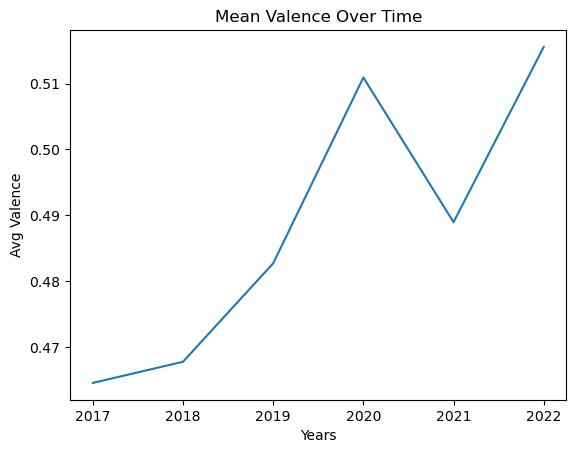

In [37]:
vale_avg_x = vale_df.index
vale_avg_y = vale_df["Mean Valence"]
plt.plot(vale_avg_x, vale_avg_y)
plt.title("Mean Valence Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Valence")
plt.savefig("../output_data/avg_vale.png")

In [38]:
# Summary statistics table for Tempo 
tempo_mean = spoti_df.groupby("Year")["tempo"].mean()
tempo_median = spoti_df.groupby("Year")["tempo"].median()
tempo_variance = spoti_df.groupby("Year")["tempo"].var()
tempo_std = spoti_df.groupby("Year")["tempo"].std()
tempo_sem = spoti_df.groupby("Year")["tempo"].sem()

# Assembling the resulting series into a DataFrame
tempo_df = pd.DataFrame({"Mean Tempo": tempo_mean, 
                         "Median Tempo": tempo_median, 
                         "Tempo Variance": tempo_variance, 
                         "Tempo Std Dev": tempo_std, 
                         "Tempo Std Error": tempo_sem})
tempo_df.index.name = "Year"
tempo_df

,Mean Tempo,Median Tempo,Tempo Variance,Tempo Std Dev,Tempo Std Error
Year,,,,,
2017,122.08699,121.0190,779.614386,27.921576,2.792158
2018,117.45763,115.5140,794.039002,28.178698,2.817870
2019,120.02856,114.6750,878.829134,29.645052,2.964505
2020,120.34594,117.9605,645.563293,25.407938,2.540794
2021,119.38212,118.0710,768.935593,27.729688,2.772969
2022,124.78068,121.4290,902.711967,30.045165,3.004517


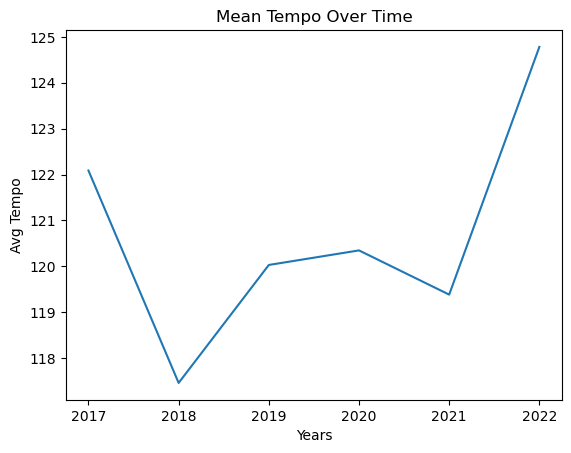

In [39]:
tempo_avg_x = tempo_df.index
tempo_avg_y = tempo_df["Mean Tempo"]
plt.plot(tempo_avg_x, tempo_avg_y)
plt.title("Mean Tempo Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Tempo")
plt.savefig("../output_data/avg_tempo.png")

#### Now look at these features for each genre, so that we can see how these compare with overall trends in track features across the past 6 years.

In [40]:
# create a df for each genre
pop_features = genre_df[genre_df["artist genre"] == "pop"]
rap_features = genre_df[genre_df["artist genre"] == "rap"]
hip_hop_features = genre_df[genre_df["artist genre"] == "hip hop"]
canadian_pop_features = genre_df[genre_df["artist genre"] == "canadian pop"]
edm_features = genre_df[genre_df["artist genre"] == "edm"]
dance_pop_features = genre_df[genre_df["artist genre"] == "dance pop"]

In [41]:
# as we will do the same analysis for each genre, we are defining a function

# the function takes arguments df (dataframe with track features for a specific genre) and genre (string with genre name)

def genre_feats(df, genre):
    
    # calculate average for each feature per year
    danceability = df.groupby("Year", as_index = True)["danceability"].mean()
    energy = df.groupby("Year", as_index = True)["energy"].mean()
    liveness = df.groupby("Year", as_index = True)["liveness"].mean()
    valence = df.groupby("Year", as_index = True)["valence"].mean()
    tempo = df.groupby("Year", as_index = True)["tempo"].mean()
    duration = df.groupby("Year", as_index = True)["duration_ms"].mean()
    
    # plot features 
    years = [2017, 2018, 2019, 2020, 2021, 2022]

    fig, axs = plt.subplots(2, 3)
    axs[0,0].plot(years, danceability)
    axs[0,0].set_title('Danceability')
    axs[0,1].plot(years, energy)
    axs[0,1].set_title('Energy')
    axs[0,2].plot(years, liveness)
    axs[0,2].set_title('Liveness')
    axs[1,0].plot(years, valence)
    axs[1,0].set_title('Valence')
    axs[1,1].plot(years, tempo)
    axs[1,1].set_title('Tempo')
    axs[1,2].plot(years, duration)
    axs[1,2].set_title('Duration')

    # fine tune it
    fig.tight_layout(h_pad=1.8)
    fig.supxlabel('Year', y = -0.03)
    fig.supylabel('Average values', x = -0.02)
    plt.suptitle(f"{genre} features per year", y = 1.05)

    # save figure
    fig.savefig(f"../output_data/{genre}_features.png", bbox_inches='tight')

    # plot figure
    plt.show()

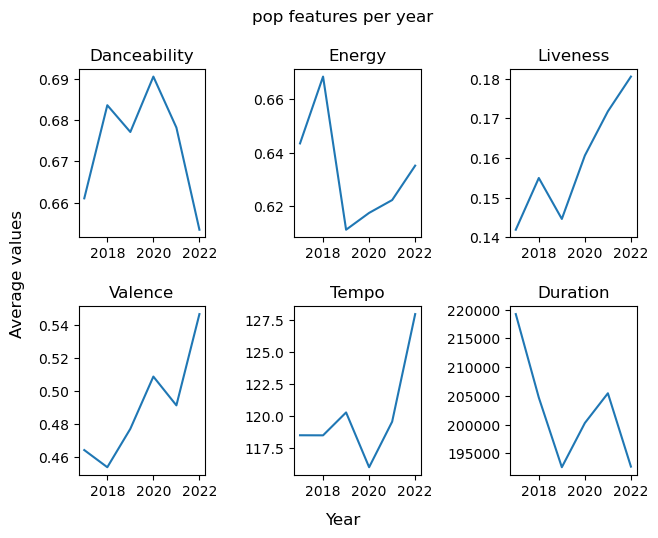

In [42]:
# plot pop features
genre_feats(pop_features, "pop")

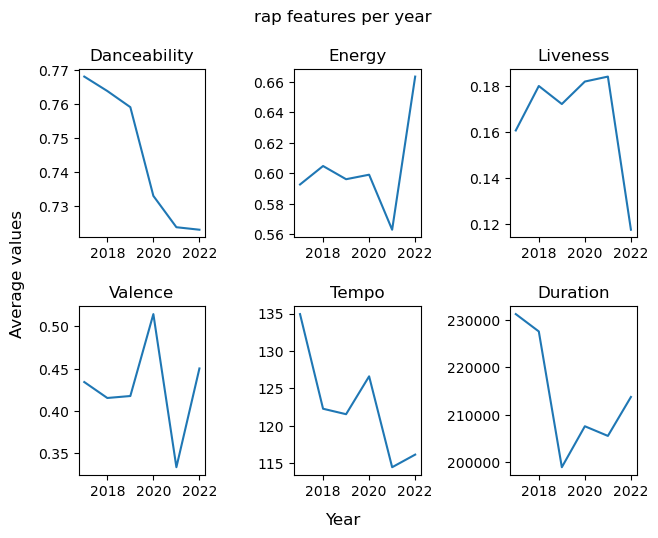

In [43]:
# plot rap features
genre_feats(rap_features, "rap")

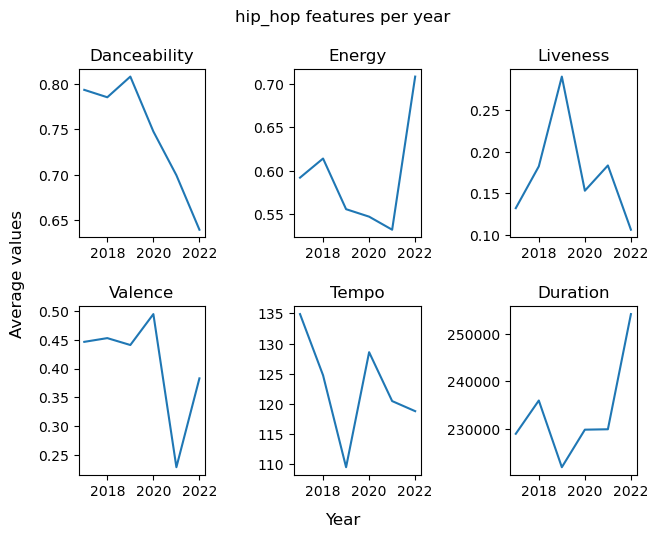

In [44]:
# plot hip hop features
genre_feats(hip_hop_features, "hip_hop")

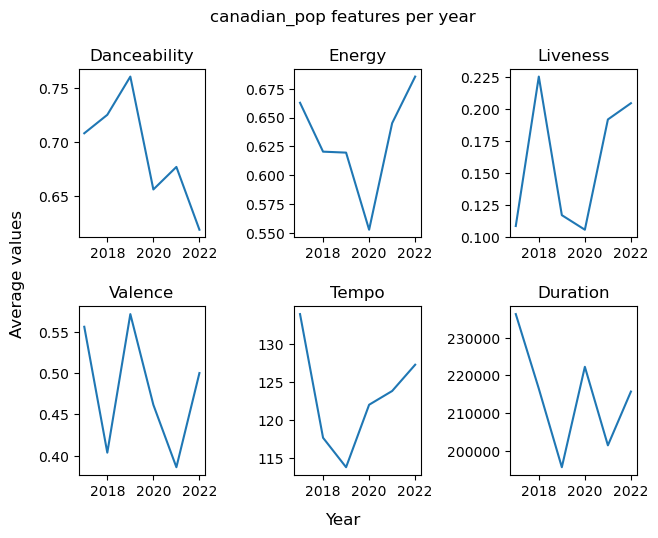

In [45]:
# plot canadian pop features
genre_feats(canadian_pop_features, "canadian_pop")

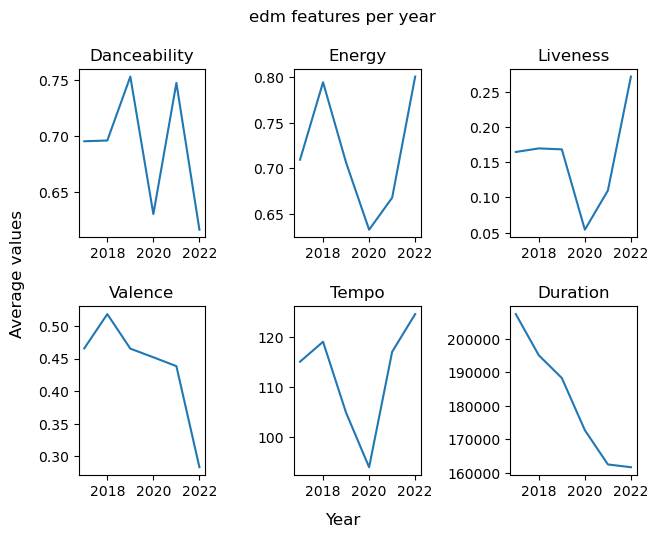

In [46]:
# plot edm features
genre_feats(edm_features, "edm")

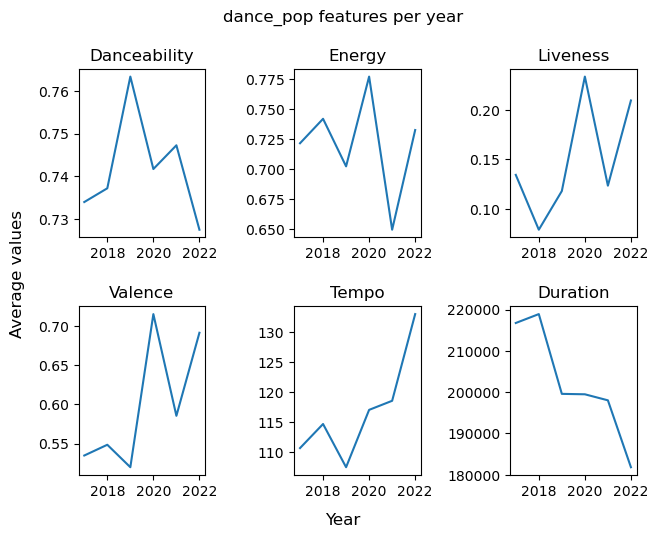

In [47]:
# plot dance pop features
genre_feats(dance_pop_features, "dance_pop")

In [48]:
# Linear Regression Function

def lin_regress(x, y):
    correlation = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, correlation

### Year Specific DataFrames

#### A series of DataFrames spliting the initial frame by years

In [49]:
# dataframes for years
sev_teen_df = spoti_df.loc[spoti_df["Year"] == 2017]
ate_teen_df = spoti_df.loc[spoti_df["Year"] == 2018]
nine_teen_df = spoti_df.loc[spoti_df["Year"] == 2019]
twenty_df = spoti_df.loc[spoti_df["Year"] == 2020]
twenty_one_df = spoti_df.loc[spoti_df["Year"] == 2021]
twenty_two_df = spoti_df.loc[spoti_df["Year"] == 2022]

### Aspect Years scatter plots

#### A series of charts showing danceability vs energy for each year, different aspects could be used. These are good aspects to put against each other.

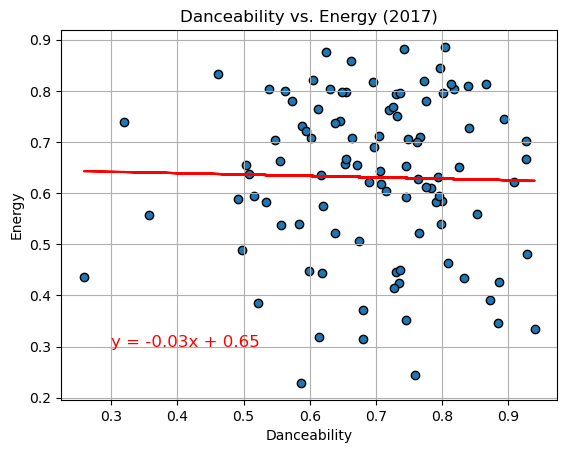

The r value is: -0.02301857313208175


In [50]:
plt.scatter(sev_teen_df["danceability"], sev_teen_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2017)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(sev_teen_df["danceability"], sev_teen_df["energy"])
plt.plot(sev_teen_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.3, 0.3), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2017_scat.png")
plt.show()
print("The r value is:", r_value[0])

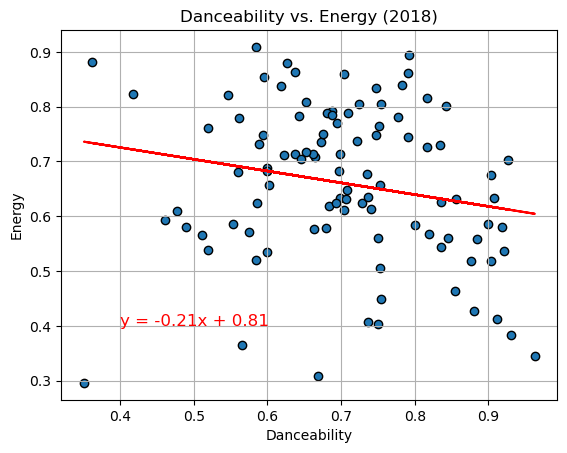

In [51]:
plt.scatter(ate_teen_df["danceability"], ate_teen_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2018)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(ate_teen_df["danceability"], ate_teen_df["energy"])
plt.plot(ate_teen_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2018_scat.png")
plt.show()


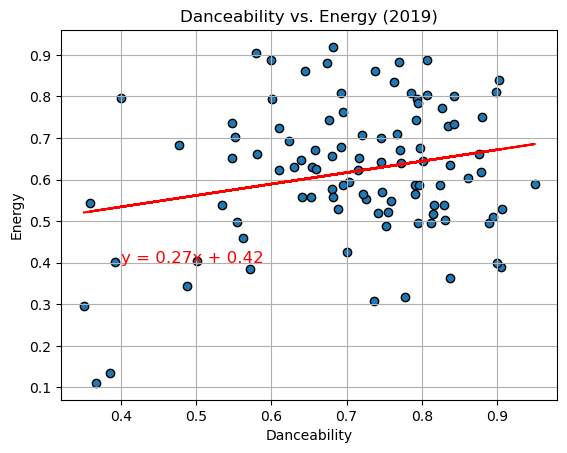

The r value is: 0.23012466442593968


In [52]:
plt.scatter(nine_teen_df["danceability"], nine_teen_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2019)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(nine_teen_df["danceability"], nine_teen_df["energy"])
plt.plot(nine_teen_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2019_scat.png")
plt.show()
print("The r value is:", r_value[0])

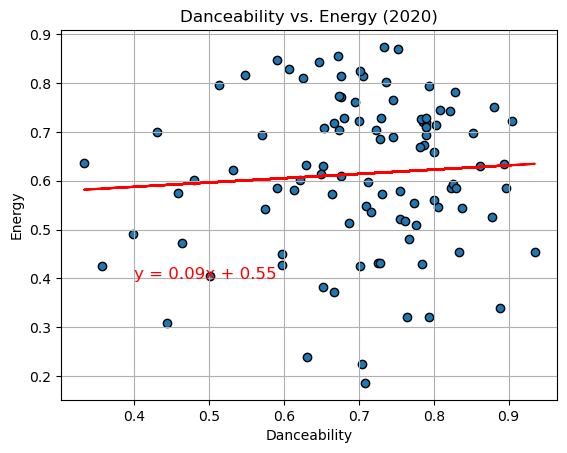

The r value is: 0.0697014833802691


In [53]:
plt.scatter(twenty_df["danceability"], twenty_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2020)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_df["danceability"], twenty_df["energy"])
plt.plot(twenty_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2020_scat.png")
plt.show()
print("The r value is:", r_value[0])

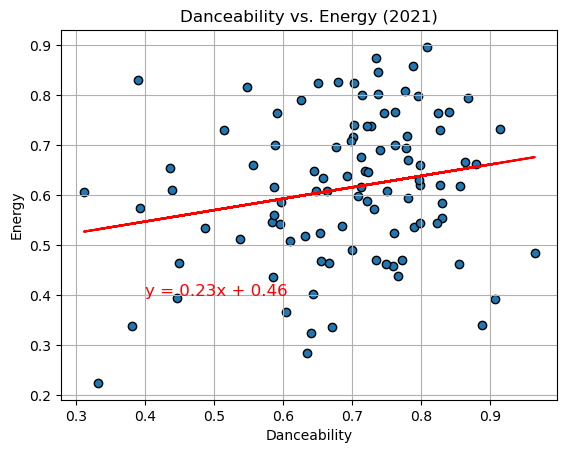

The r value is: 0.20665093004800494


In [54]:
plt.scatter(twenty_one_df["danceability"], twenty_one_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2021)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_one_df["danceability"], twenty_one_df["energy"])
plt.plot(twenty_one_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2021_scat.png")
plt.show()
print("The r value is:", r_value[0])

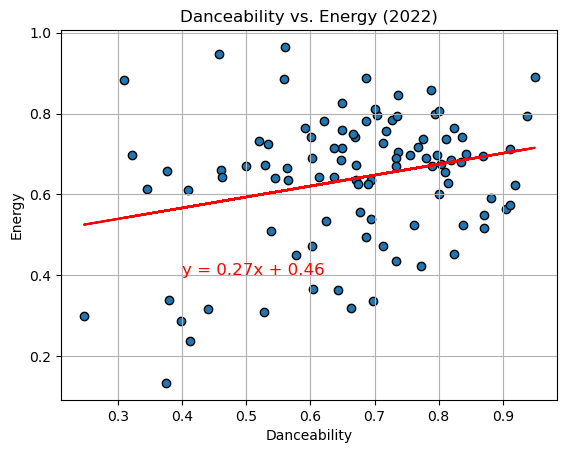

The r value is: 0.2588151516767542


In [55]:
plt.scatter(twenty_two_df["danceability"], twenty_two_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2022)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_two_df["danceability"], twenty_two_df["energy"])
plt.plot(twenty_two_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2022_scat.png")
plt.show()
print("The r value is:", r_value[0])

### Duration vs Tempo each year

#### A series of scatters for dance vs tempo each year

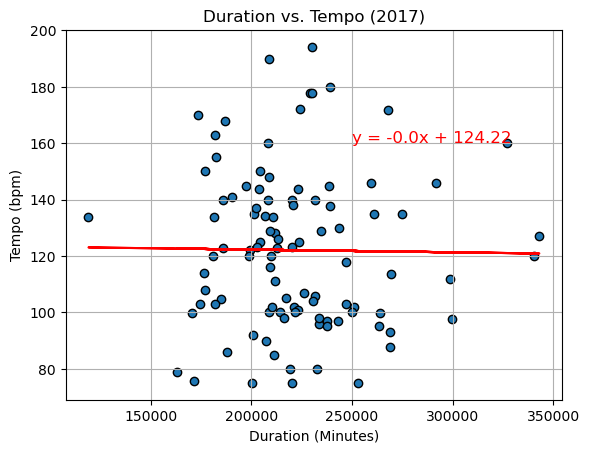

The r value is: -0.012668693249463656


In [56]:
plt.scatter(sev_teen_df["duration_ms"], sev_teen_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2017)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(sev_teen_df["duration_ms"], sev_teen_df["tempo"])
plt.plot(sev_teen_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2017_scat.png")
plt.show()
print("The r value is:", r_value[0])

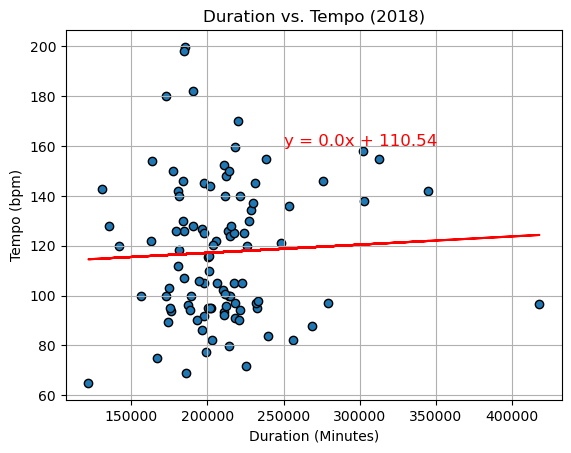

The r value is: 0.04836732278871974


In [57]:
plt.scatter(ate_teen_df["duration_ms"], ate_teen_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2018)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(ate_teen_df["duration_ms"], ate_teen_df["tempo"])
plt.plot(ate_teen_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2018_scat.png")
plt.show()
print("The r value is:", r_value[0])

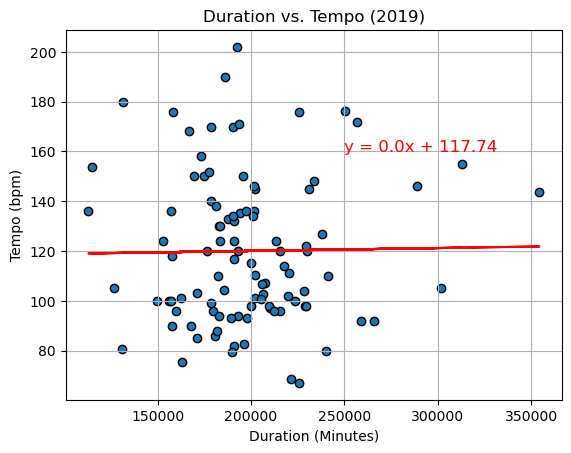

In [58]:
plt.scatter(nine_teen_df["duration_ms"], nine_teen_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2019)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(nine_teen_df["duration_ms"], nine_teen_df["tempo"])
plt.plot(nine_teen_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2019_scat.png")
plt.show()

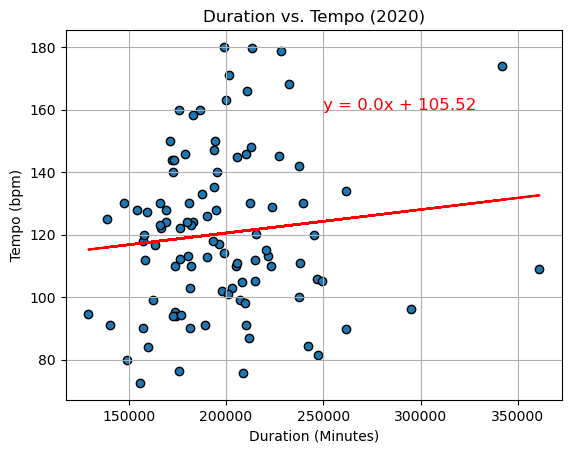

The r value is: 0.11025461162984761


In [59]:
plt.scatter(twenty_df["duration_ms"], twenty_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2020)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_df["duration_ms"], twenty_df["tempo"])
plt.plot(twenty_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2020_scat.png")
plt.show()
print("The r value is:", r_value[0])

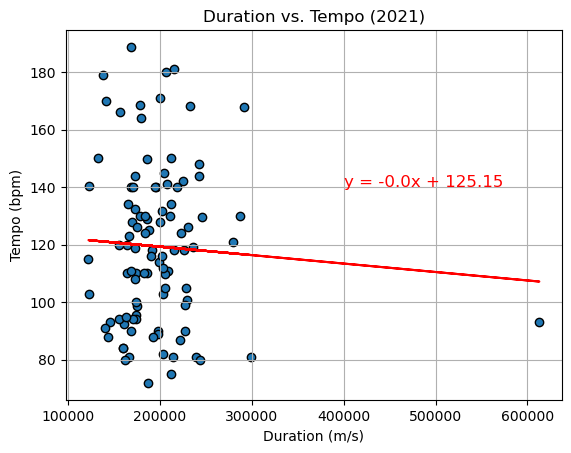

In [60]:
plt.scatter(twenty_one_df["duration_ms"], twenty_one_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2021)")
plt.xlabel('Duration (m/s)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_one_df["duration_ms"], twenty_one_df["tempo"])
plt.plot(twenty_one_df["duration_ms"], lin_r, color = "red")
slope_2021 = plt.annotate(lin_r_eq, (400000, 140), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2021_scat.png")
plt.show()

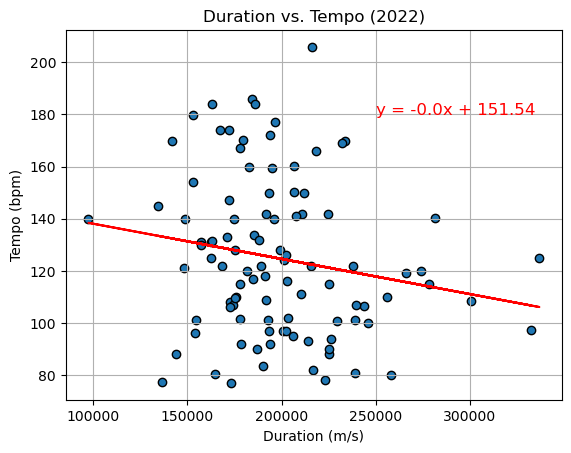

In [61]:
plt.scatter(twenty_two_df["duration_ms"], twenty_two_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2022)")
plt.xlabel('Duration (m/s)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_two_df["duration_ms"], twenty_two_df["tempo"])
plt.plot(twenty_two_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 180), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2022_scat.png")
plt.show()

# Extra Section

##### The most obvious lens to examine the scope of the coronavirus’ impact on music is through sales, the numbers measuring our consumption of music. Following the beginning of the pandemic, physical sales — representing 25% of recorded music revenue — have fallen by about one-third, while digital sales have fallen 11%. 

##### The main difference in post-COVID streaming lies in what is actually being streamed. Spotify noted that daily listening habits are more reflective of typical weekend consumption, with relaxing music genres rising in popularity. Additionally, the pandemic has caused an increase in music video streams. These are all likely due to the amount of time individuals are spending at home during these months.

##### The coronavirus has also had a notable impact on artists’ schedules for producing and releasing music. The pandemic’s damage has resulted in the delaying of albums for even some of the most anticipated artists of the year. The main issue is less about the production of the music itself, most of which is already done in a small, intimate studio setting. The issue in production and releases lies in promotion. In the age where music is being consumed primarily on digital platforms like Spotify and Apple Music, promotion is a critical factor for artists, especially those that don’t have a huge following on conventional social media as artists like Drake do, who would find little difficulty in promoting new music to his 69.6 million Instagram followers. 

##### Many artists use touring as an important factor in their release schedule, with tours being one of the main ways an artist promotes a new release.

##### These artists, however, have managed to defy all odds, using their huge social media following to produce and release music during and after the COVID-19 pandemic setback.

- sources from BBC NEWS, Forbes, Apple's most-popular, Spotify's most-streamed, TikTok's most popular

#### Note: Para 1-4: https://wqhs.upenn.edu/covid-19s-impact-on-music-an-analysis-of-the-industry-post-lockdown/

In [62]:
# KEH

# Authorisation
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
from config import client_id
from config import client_secret

# Initialize the Spotify client with client credentials flow
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = sp.Spotify(client_credentials_manager=client_credentials_manager)

In [63]:
# KEH

taylor_uri = 'spotify:artist:06HL4z0CvFAxyc27GXpf02'
results = sp.artist_albums(taylor_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

1989 (Taylor's Version) [Deluxe]
1989 (Taylor's Version)
Speak Now (Taylor's Version)
Midnights (The Til Dawn Edition)
Midnights (3am Edition)
Midnights
Red (Taylor's Version)
Fearless (Taylor's Version)
evermore (deluxe version)
evermore
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]
folklore (deluxe version)
folklore
Lover
reputation
reputation Stadium Tour Surprise Song Playlist
1989 (Deluxe)
1989
Red (Deluxe Edition)
Speak Now World Tour Live
Speak Now
Speak Now (Deluxe Package)
Fearless (Platinum Edition)
Fearless (International Version)
Live From Clear Channel Stripped 2008
Taylor Swift


In [64]:
# KEH

# Create a DataFrame from pre covid vs post covid
taylor_df = pd.DataFrame([
    {"Artists" : "Taylor Swift", "ALBUMS RELEASED Pre-COVID-19" : 6, "ALBUMS RELEASED Post-COVID-19" : 8, 
     "Performance before COVID-19" : "Very Popular",
    "Performance after COVID-19" : "Very Popular"}
])
taylor_df

,Artists,ALBUMS RELEASED Pre-COVID-19,ALBUMS RELEASED Post-COVID-19,Performance before COVID-19,Performance after COVID-19
0,Taylor Swift,6,8,Very Popular,Very Popular


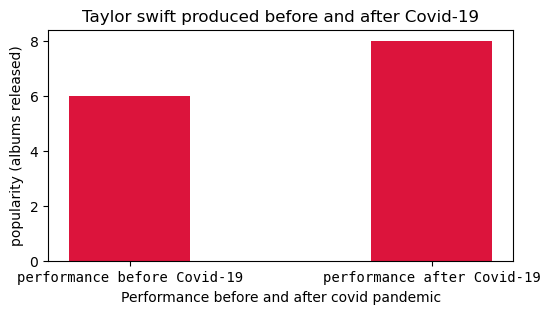

This graphs shows Taylor Swift's performance and production throughout the time period of pre-Covid-19 and post-Covid-19.


In [65]:
# KEH

# creating the dataset
data = {'performance before Covid-19':6, 'performance after Covid-19':8}
performance = list(data.keys())
values = list(data.values())
courses = ["performance before Covid-19","performance after Covid-19"]

fig = plt.figure(figsize = (6, 3))

# creating the bar plot
plt.bar(courses, values, color ='crimson', 
        width = 0.4)
 
plt.xlabel("Performance before and after covid pandemic")
plt.ylabel("popularity (albums released)")
plt.title("Taylor swift produced before and after Covid-19")
plt.style.use('dark_background')
plt.xticks(fontsize=10, fontname='monospace')
plt.show()

print("This graphs shows Taylor Swift's performance and production throughout the time period of pre-Covid-19 and post-Covid-19.")

In [66]:
# KEH

drake_uri = 'spotify:artist:3TVXtAsR1Inumwj472S9r4'
results = sp.artist_albums(drake_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

For All The Dogs Scary Hours Edition
For All The Dogs
Her Loss
Honestly, Nevermind
Certified Lover Boy
Dark Lane Demo Tapes
Care Package
Scorpion
More Life
Views
What A Time To Be Alive
If You're Reading This It's Too Late
Nothing Was The Same (Deluxe)
Nothing Was The Same
Take Care (Deluxe)
Thank Me Later (Int'l Version)
So Far Gone


In [67]:
# KEH

# Create a DataFrame from a list of dictionaries.
drake_df = pd.DataFrame([
    {"Artist": "Drake", "ALBUMS RELEASED before COVID-19": 10,
     "ALBUMS RELEASED post COVID-19": 6, "Popularity before COVID-19": "Very Popular", "Popularity post COVID-19" : "Very Popular"},
])
drake_df

,Artist,ALBUMS RELEASED before COVID-19,ALBUMS RELEASED post COVID-19,Popularity before COVID-19,Popularity post COVID-19
0,Drake,10,6,Very Popular,Very Popular


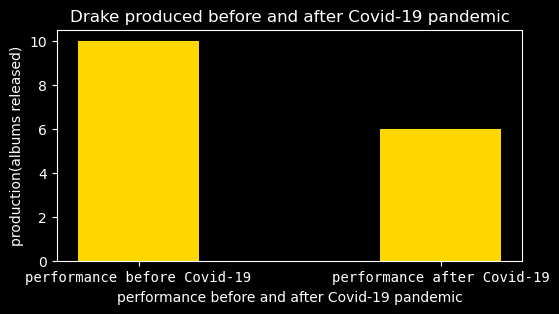

This graphs shows Drake's performance and production throughout the time period of pre-Covid-19 and post-Covid-19.


In [68]:
# creating the dataset
data = {'performance before Covid-19':10, 'performance after Covid-19': 6}
performance = list(data.keys())
values = list(data.values())
courses = ["performance before Covid-19","performance after Covid-19"]

fig = plt.figure(figsize = (6, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='gold', 
        width = 0.4)
 
plt.xlabel("performance before and after Covid-19 pandemic")
plt.ylabel("production(albums released)")
plt.title("Drake produced before and after Covid-19 pandemic")
plt.style.use('dark_background')
plt.xticks(fontsize=10, fontname='monospace')
plt.show()

print("This graphs shows Drake's performance and production throughout the time period of pre-Covid-19 and post-Covid-19.")

In [69]:
# KEH

the_weeknd_uri = 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'
results = sp.artist_albums(the_weeknd_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Starboy (Deluxe)
Live At SoFi Stadium
Avatar: The Way of Water (Original Motion Picture Soundtrack)
Dawn FM (Alternate World)
Dawn FM
After Hours (Deluxe)
After Hours
My Dear Melancholy,
Starboy
Beauty Behind The Madness
Kiss Land (Deluxe)
Kiss Land
Trilogy
Echoes Of Silence (Original)
Thursday (Original)
House Of Balloons (Original)


In [70]:
# KEH

# Create a DataFrame from a list of dictionaries.
the_weeknd_df = pd.DataFrame([
    {"Artist": "the weeknd", "ALBUMS RELEASED pre-COVID-19": 8,
     "ALBUMS RELEASED Post-COVID-19": 8, "Popularity pre-COVID-19": "Very Popular", "Popularity post-COVID-19" : "Very Popular"},
])
the_weeknd_df

,Artist,ALBUMS RELEASED pre-COVID-19,ALBUMS RELEASED Post-COVID-19,Popularity pre-COVID-19,Popularity post-COVID-19
0,the weeknd,8,8,Very Popular,Very Popular


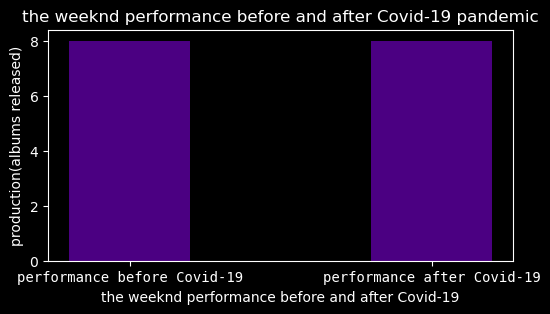

'the weeknd' performed and produced consistently throughout the time period of pre-Covid-19 and post-Covid-19.


In [71]:
# KEH

# creating the dataset
data = {'the weeknd performance before covid-19':8, 'the weeknd after Covid-19': 8}
performance = list(data.keys())
values = list(data.values())
courses = ["performance before Covid-19","performance after Covid-19"]

fig = plt.figure(figsize = (6, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='indigo', 
        width = 0.4)
 
plt.xlabel("the weeknd performance before and after Covid-19")
plt.ylabel("production(albums released)")
plt.title("the weeknd performance before and after Covid-19 pandemic")
plt.style.use('dark_background')
plt.xticks(fontsize=10, fontname='monospace')
plt.show()

print("'the weeknd' performed and produced consistently throughout the time period of pre-Covid-19 and post-Covid-19.")

In [72]:
# KEH

ariana_grande_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'

results = sp.artist_albums(ariana_grande_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Yours Truly (Tenth Anniversary Edition)
Positions (Deluxe)
Positions
k bye for now (swt live)
thank u, next
Sweetener
Dangerous Woman
My Everything (Deluxe)
Yours Truly


In [73]:
# KEH

#Create a Dataframe from a list of dictionaries 
# Create a DataFrame from a list of dictionaries.
ariana_df = pd.DataFrame([
    {"Artist": "Ariana Grande", "ALBUMS RELEASED pre-COVID-19": 3, "ALBUMS RELEASED post-COVID-19": 6,
     "Popularity pre-COVID-19": "Very Popular", "Popularity post-COVID-19" : "Very Popular"}
])
ariana_df

,Artist,ALBUMS RELEASED pre-COVID-19,ALBUMS RELEASED post-COVID-19,Popularity pre-COVID-19,Popularity post-COVID-19
0,Ariana Grande,3,6,Very Popular,Very Popular


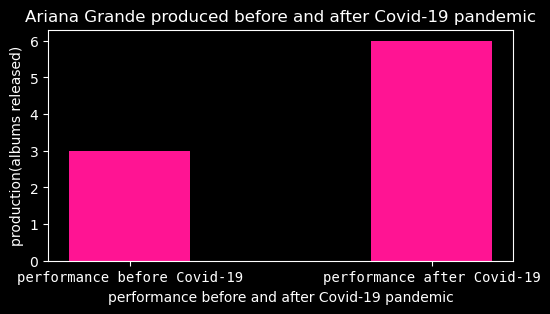

This graph shows Ariana grande's performance throughout the time period of pre-Covid-19 and post-Covid-19.


In [74]:
# KEH

# creating the dataset
data = {'performance before Covid-19':3, 'performance after Covid-19': 6}
performance = list(data.keys())
values = list(data.values())
courses = ["performance before Covid-19","performance after Covid-19"]

fig = plt.figure(figsize = (6, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='deeppink', 
        width = 0.4)
 
plt.xlabel("performance before and after Covid-19 pandemic")
plt.ylabel("production(albums released)")
plt.title("Ariana Grande produced before and after Covid-19 pandemic")
plt.style.use('dark_background')
plt.xticks(fontsize=10, fontname='monospace')
plt.show()

print("This graph shows Ariana grande's performance throughout the time period of pre-Covid-19 and post-Covid-19.")

In [75]:
# KEH

ed_sheeren_uri = 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'

results = sp.artist_albums(ed_sheeren_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Autumn Variations (Fan Living Room Sessions)
Autumn Variations
- (Deluxe)
=
2step (The Remixes)
= (Tour Edition)
No.6 Collaborations Project
÷ (Deluxe)
x (Wembley Edition)
x (Deluxe Edition)
Loose Change
Live at the Bedford
No.5 Collaborations Project
+


In [76]:
# KEH

# Create a DataFrame from a list of dictionaries.
ed_sheeren_df = pd.DataFrame([
    {"Artist": "Ed Sheeren", "ALBUMS RELEASED before COVID-19": 7,
     "Popularity BEFORE COVID-19": "Very Popular",
    "Popularity POST COVID-19": "Very Popular", "ALBUMS RELEASED post COVID-19": 7}
])
ed_sheeren_df

,Artist,ALBUMS RELEASED before COVID-19,Popularity BEFORE COVID-19,Popularity POST COVID-19,ALBUMS RELEASED post COVID-19
0,Ed Sheeren,7,Very Popular,Very Popular,7


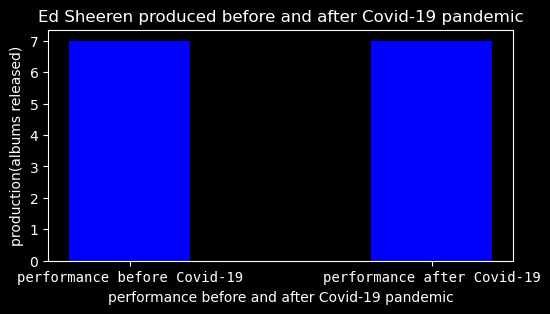

'Ed Sheeren' performed and produced consistently throughout the time period of pre COVID-19 and post COVID-19.


In [77]:
# KEH

# creating the dataset
data = {'performance before Covid-19':7, 'performance after Covid-19': 7}
performance = list(data.keys())
values = list(data.values())
courses = ["performance before Covid-19","performance after Covid-19"]

fig = plt.figure(figsize = (6, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='blue', 
        width = 0.4)
 
plt.xlabel("performance before and after Covid-19 pandemic")
plt.ylabel("production(albums released)")
plt.title("Ed Sheeren produced before and after Covid-19 pandemic")
plt.style.use('dark_background')
plt.xticks(fontsize=10, fontname='monospace')
plt.show()

print("'Ed Sheeren' performed and produced consistently throughout the time period of pre COVID-19 and post COVID-19.")

# Conclusions

In this project, we aimed to investigate how people's listening habits have changed in the past 6 years. 

We posted the following questions, and from our data analyses, we can derive the following conclusions:


### 1. Have the music genres people listen to changed?
- Pop and rap consistently occupy the first two positions at the top of the most listened-to genres 
- A lot of sub-genres of pop seem to have risen around the period of COVID-19 (e.g., Canadian pop, dance-pop, etc), and whilst some of these sub-genres - like Canadian pop remain popular after the pandemic, others like dance-pop seem to have had a short-lived popularity
- In contrast, sub-genres of rap disappeared. Perhaps associated with the rise of Latin rap and other Latino music, which gained a lot of popularity after the COVID-19 pandemic.
- EDM decreased steadily before COVID-19, but in 2020 it disappeared from the top 10. This music genre is largely driven by raves, so it is perhaps unsurprising that it disappeared at a time when social gatherings were not allowed

### 2. Have the music artists people listen to changed?

- Artists’ songs seem to be getting shorter, which leads us to explore this topic in more detail in the next question.

### 3. Is the duration of the most popular songs decreasing?
- Songs are getting shorter in general.
- Song duration does not correlate with track popularity. However, this might be related to the fact that our data only contains highly popular songs.
- Song duration correlates strongly with the number of Tik-Tok users, so that the higher the number of Tik-Tok users, the smaller the duration of the songs. 


### 4. How have other track features changed?
- From 2019 to 2022:
    - Danceability and energy went down
    - Liveness and valence went up
- None of the specific genres we look at seem to mirror the overall trend in the features.


# Limitations & things to bear in mind
- We only have top songs (which are all popular) to look into. Thus, we can’t draw comparisons with less popular songs
- Our data shows the year a song was popular, not when it was released.
- We only have data for 6 years - a lot of these trends might be occurring for longer (as one article on Billboard suggested, the duration of top 100 hit songs has changed since 2000)